In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

#### 서울시 시군구 전체 대상자와 수검자수에 대한 암 발생률

In [3]:
df = pd.read_csv("./data/암.csv", encoding='cp949')
df.head()

,시도,시군구,연령,성별,전체대상자수,전체수검자수,위암대상자수,위암수검자수,대장암대상자수,대장암수검자수,간암대상자수,간암수검자수,유방암대상자수,유방암수검자수,자궁경부암대상자수,자궁경부암수검자수,폐암대상자수,폐암수검자수
0,서울특별시,종로구,20-24세,여자,2077,788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2077.0,788.0,NaN,NaN
1,서울특별시,종로구,25-29세,여자,2084,1173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2084.0,1173.0,NaN,NaN
2,서울특별시,종로구,30-34세,여자,2832,1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2832.0,1732.0,NaN,NaN
3,서울특별시,종로구,35-39세,여자,1837,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1837.0,1105.0,NaN,NaN
4,서울특별시,종로구,40-44세,남자,2673,1478,2613.0,1437.0,NaN,NaN,126.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.tail()

,시도,시군구,연령,성별,전체대상자수,전체수검자수,위암대상자수,위암수검자수,대장암대상자수,대장암수검자수,간암대상자수,간암수검자수,유방암대상자수,유방암수검자수,자궁경부암대상자수,자궁경부암수검자수,폐암대상자수,폐암수검자수
5996,제주특별자치도,서귀포시,75-79세,여자,3017,1308,1461.0,893.0,2917.0,970.0,100.0,53.0,1393.0,799.0,1161.0,348.0,NaN,NaN
5997,제주특별자치도,서귀포시,80-84세,남자,1643,694,1093.0,522.0,1574.0,516.0,38.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
5998,제주특별자치도,서귀포시,80-84세,여자,2655,1031,1790.0,794.0,2579.0,716.0,84.0,28.0,1767.0,724.0,1551.0,210.0,NaN,NaN
5999,제주특별자치도,서귀포시,85세 이상,남자,860,228,416.0,156.0,837.0,150.0,16.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
6000,제주특별자치도,서귀포시,85세 이상,여자,2406,365,1258.0,256.0,2364.0,190.0,30.0,6.0,1262.0,263.0,1108.0,19.0,NaN,NaN


- 전체 대상자수: 각 암검진 항목별 대상자 중 실 대상자 수
- 전체 수검자수: 각 암검진 항목별 수검자 중 실 수검자 수
- 암검진 항목별 대상자 및 수검자수: 위암, 대장암, 간암, 유방암, 자궁경부암, 폐암
    - 암검진 대상자가 없을 경우, 빈 값이 존재할 수 있음

# 데이터 확인

In [4]:
df.dtypes

시도            object
시군구           object
연령            object
성별            object
전체대상자수         int64
전체수검자수         int64
위암대상자수       float64
위암수검자수       float64
대장암대상자수      float64
대장암수검자수      float64
간암대상자수       float64
간암수검자수       float64
유방암대상자수      float64
유방암수검자수      float64
자궁경부암대상자수    float64
자궁경부암수검자수    float64
폐암대상자수       float64
폐암수검자수       float64
dtype: object

In [5]:
df.describe()

,전체대상자수,전체수검자수,위암대상자수,위암수검자수,대장암대상자수,대장암수검자수,간암대상자수,간암수검자수,유방암대상자수,유방암수검자수,자궁경부암대상자수,자궁경부암수검자수,폐암대상자수,폐암수검자수
count,6001.000000,6001.000000,5000.000000,5000.000000,4000.000000,4000.000000,4997.000000,4997.000000,2500.000000,2500.000000,3500.000000,3500.000000,2254.000000,2254.000000
mean,3988.895684,2258.765372,2680.985400,1692.514000,4100.959000,1625.890750,164.385631,122.156294,2791.812400,1803.545600,2715.208571,1638.758286,112.307897,51.631322
std,4066.026249,2464.013003,2820.505252,1853.812067,4115.392178,1739.586379,184.689765,140.976178,2869.852551,2029.153049,2788.589927,1920.092620,166.496216,82.689067
min,1.000000,0.000000,24.000000,1.000000,62.000000,4.000000,1.000000,0.000000,61.000000,1.000000,50.000000,0.000000,1.000000,0.000000
25%,1122.000000,499.000000,716.000000,387.000000,1268.500000,391.000000,34.000000,21.000000,794.750000,379.000000,690.500000,272.000000,4.000000,2.000000
50%,2530.000000,1279.000000,1538.500000,912.000000,2464.000000,920.500000,88.000000,63.000000,1606.000000,910.500000,1650.000000,837.000000,39.000000,14.000000
75%,5593.000000,3304.000000,3870.000000,2526.250000,5699.500000,2413.000000,247.000000,187.000000,3961.000000,2721.000000,3990.500000,2444.750000,157.750000,69.750000
max,32967.000000,21601.000000,24228.000000,14475.000000,30769.000000,15733.000000,1611.000000,1103.000000,23143.000000,15055.000000,23527.000000,15408.000000,1616.000000,878.000000


In [6]:
df.shape

(6001, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도         6001 non-null   object 
 1   시군구        6001 non-null   object 
 2   연령         6001 non-null   object 
 3   성별         6001 non-null   object 
 4   전체대상자수     6001 non-null   int64  
 5   전체수검자수     6001 non-null   int64  
 6   위암대상자수     5000 non-null   float64
 7   위암수검자수     5000 non-null   float64
 8   대장암대상자수    4000 non-null   float64
 9   대장암수검자수    4000 non-null   float64
 10  간암대상자수     4997 non-null   float64
 11  간암수검자수     4997 non-null   float64
 12  유방암대상자수    2500 non-null   float64
 13  유방암수검자수    2500 non-null   float64
 14  자궁경부암대상자수  3500 non-null   float64
 15  자궁경부암수검자수  3500 non-null   float64
 16  폐암대상자수     2254 non-null   float64
 17  폐암수검자수     2254 non-null   float64
dtypes: float64(12), int64(2), object(4)
memory usage: 844.0+ KB


## 결측치 확인

In [8]:
df.isna().sum().loc[df.isna().sum() >= 1]

위암대상자수       1001
위암수검자수       1001
대장암대상자수      2001
대장암수검자수      2001
간암대상자수       1004
간암수검자수       1004
유방암대상자수      3501
유방암수검자수      3501
자궁경부암대상자수    2501
자궁경부암수검자수    2501
폐암대상자수       3747
폐암수검자수       3747
dtype: int64

## 결측치 시각화

<Axes: >

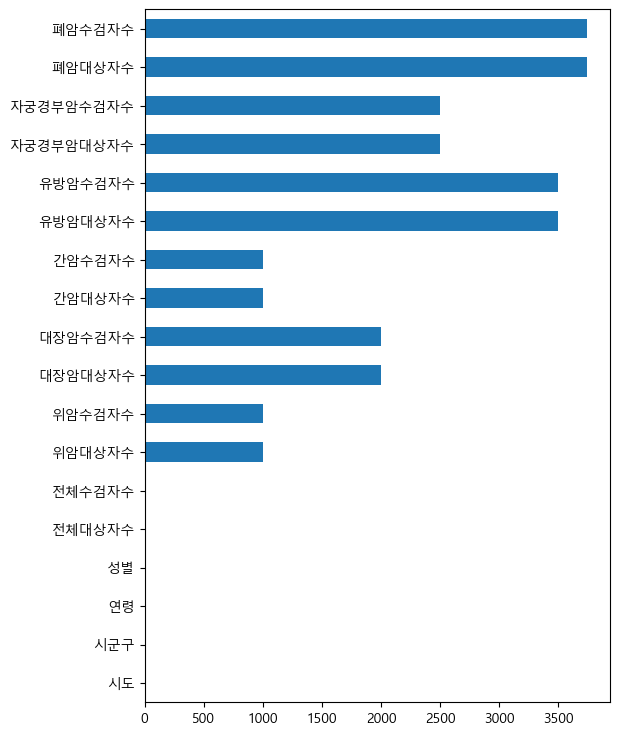

In [9]:
df.isnull().sum().plot.barh(figsize=(6,9))

# 데이터 전처리

## 서울특별시 시도별 분류

In [11]:
seoul_data = df[df['시도']=='서울특별시']
seoul_data.head()

,시도,시군구,연령,성별,전체대상자수,전체수검자수,위암대상자수,위암수검자수,대장암대상자수,대장암수검자수,간암대상자수,간암수검자수,유방암대상자수,유방암수검자수,자궁경부암대상자수,자궁경부암수검자수,폐암대상자수,폐암수검자수
0,서울특별시,종로구,20-24세,여자,2077,788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2077.0,788.0,NaN,NaN
1,서울특별시,종로구,25-29세,여자,2084,1173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2084.0,1173.0,NaN,NaN
2,서울특별시,종로구,30-34세,여자,2832,1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2832.0,1732.0,NaN,NaN
3,서울특별시,종로구,35-39세,여자,1837,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1837.0,1105.0,NaN,NaN
4,서울특별시,종로구,40-44세,남자,2673,1478,2613.0,1437.0,NaN,NaN,126.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN


## 전체대상자 및 전체수검자 수 분리

In [12]:
data = seoul_data.loc[:,['시군구', '연령', '성별', '전체대상자수', '전체수검자수'] ]
data

,시군구,연령,성별,전체대상자수,전체수검자수
0,종로구,20-24세,여자,2077,788
1,종로구,25-29세,여자,2084,1173
2,종로구,30-34세,여자,2832,1732
3,종로구,35-39세,여자,1837,1105
4,종로구,40-44세,남자,2673,1478
...,...,...,...,...,...
595,강동구,75-79세,여자,4976,2154
596,강동구,80-84세,남자,2530,1098
597,강동구,80-84세,여자,3115,1058
598,강동구,85세 이상,남자,1115,252


In [13]:
# 시군구 성별별 그룹화
sex_data = seoul_data.groupby(['시군구','성별']).agg({ '전체대상자수': 'sum', '전체수검자수': 'sum'})
sex_data = pd.DataFrame(sex_data).reset_index()
sex_data.head()

,시군구,성별,전체대상자수,전체수검자수
0,강남구,남자,95272,42370
1,강남구,여자,141550,75124
2,강동구,남자,84709,45327
3,강동구,여자,121878,71877
4,강북구,남자,60009,30662


In [14]:
# 시군구 연령별 그룹화
age_data = seoul_data.groupby(['시군구','연령']).agg({ '전체대상자수': 'sum', '전체수검자수': 'sum'})
age_data = pd.DataFrame(age_data).reset_index()
age_data.head()

,시군구,연령,전체대상자수,전체수검자수
0,강남구,20-24세,6471,1875
1,강남구,25-29세,6791,3928
2,강남구,30-34세,11588,7378
3,강남구,35-39세,7987,5044
4,강남구,40-44세,25545,16020


In [15]:
# 전체수검자수 비율
data["전체수검자수"] = round(data["전체수검자수"] / data["전체대상자수"] * 100, 1)
data.pivot_table(index = "성별", values = "전체수검자수", aggfunc = "mean")
data.pivot_table(index = "시군구", values = "전체수검자수", aggfunc = "mean")
data.head()

,시군구,연령,성별,전체대상자수,전체수검자수
0,종로구,20-24세,여자,2077,37.9
1,종로구,25-29세,여자,2084,56.3
2,종로구,30-34세,여자,2832,61.2
3,종로구,35-39세,여자,1837,60.2
4,종로구,40-44세,남자,2673,55.3


## 서울시 연령별

In [17]:
# 시군구 연령별 인덱스
index_age = age_test.set_index("연령")
index_age = index_age.drop('시군구', axis=1)
index_age

,전체대상자수,전체수검자수
연령,,
20-24세,6471,1875
25-29세,6791,3928
30-34세,11588,7378
35-39세,7987,5044
40-44세,25545,16020
45-49세,19691,12576
50-54세,40422,18949
55-59세,29347,12249
60-64세,27302,13484


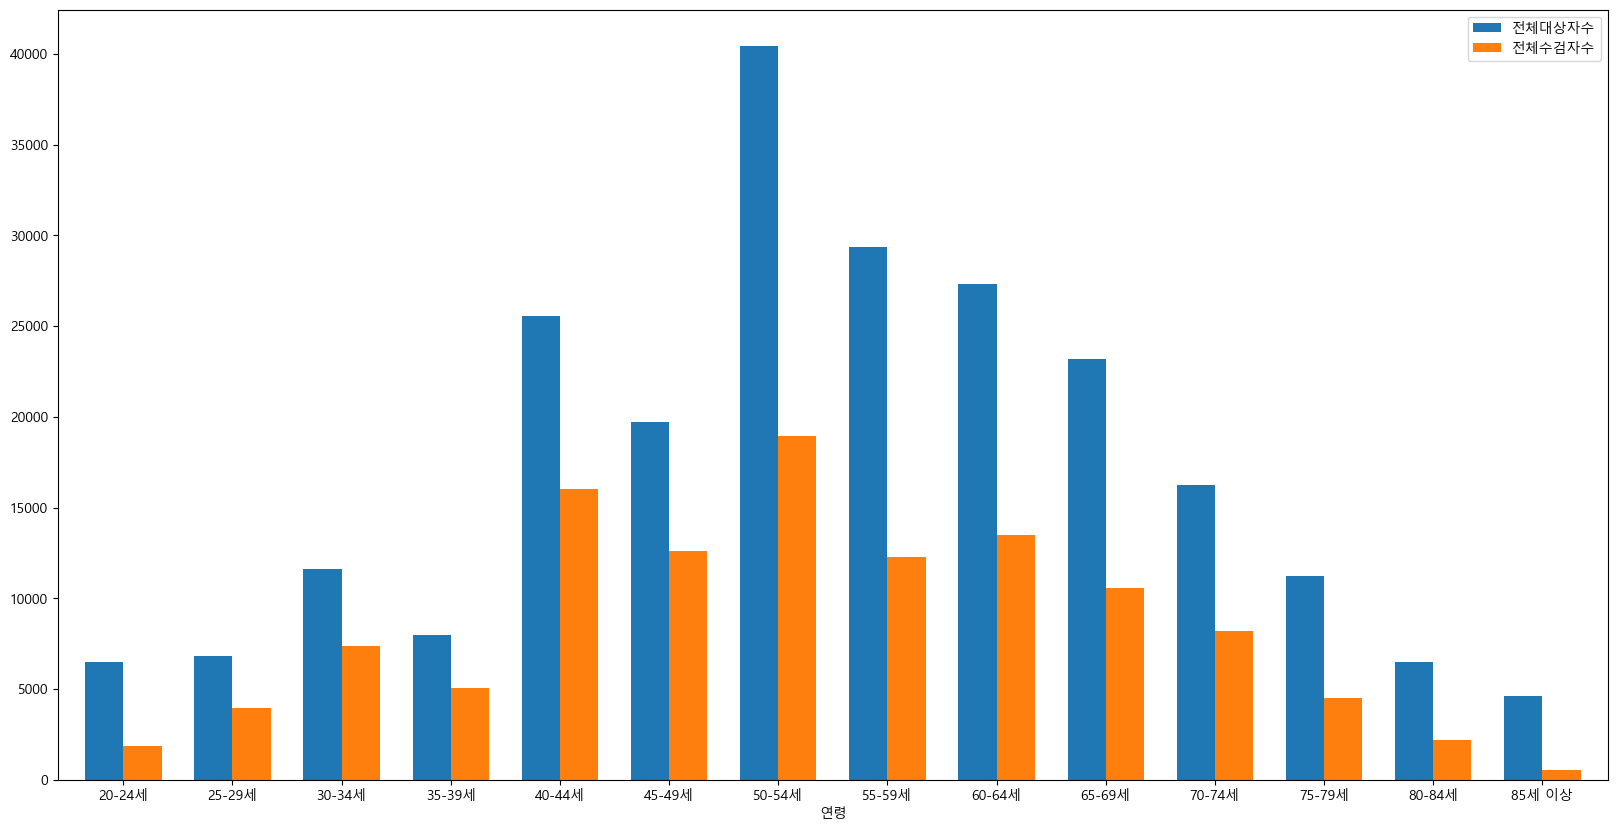

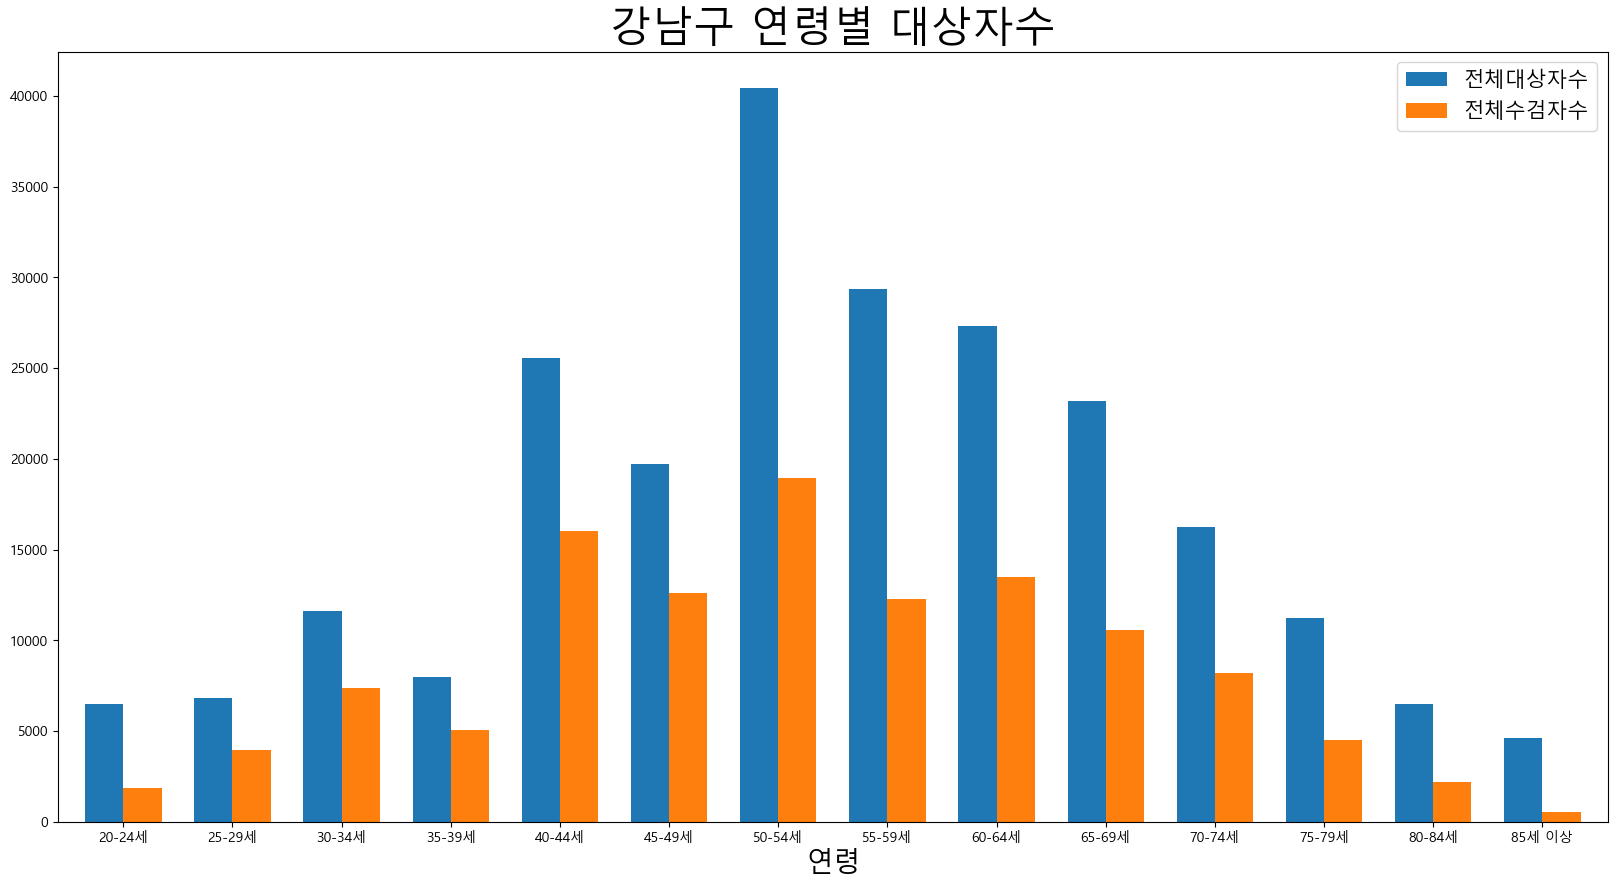

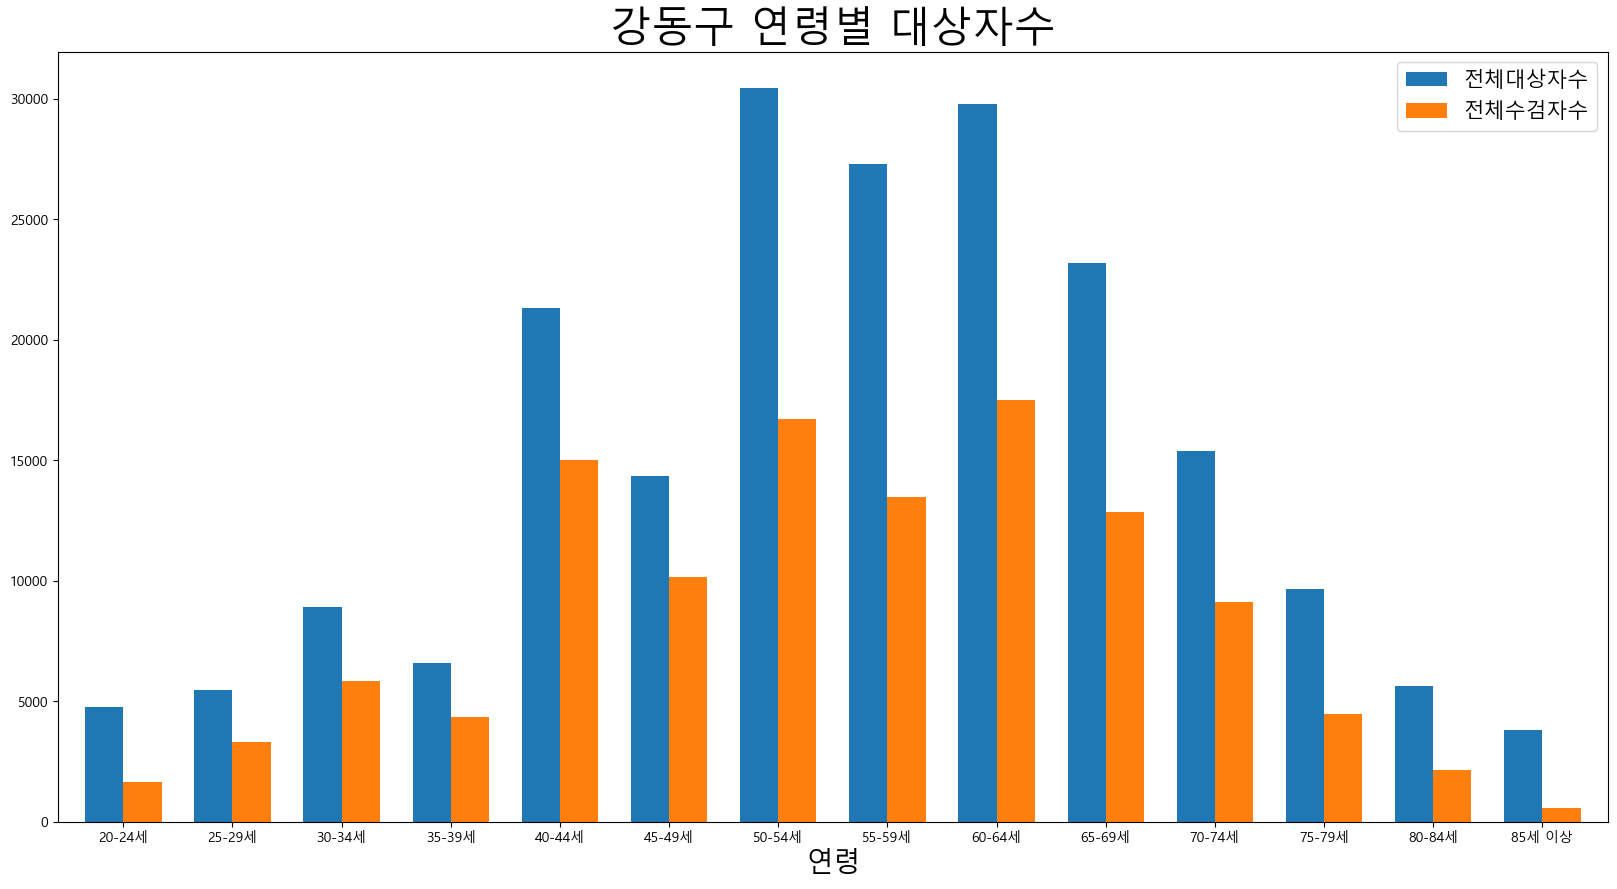

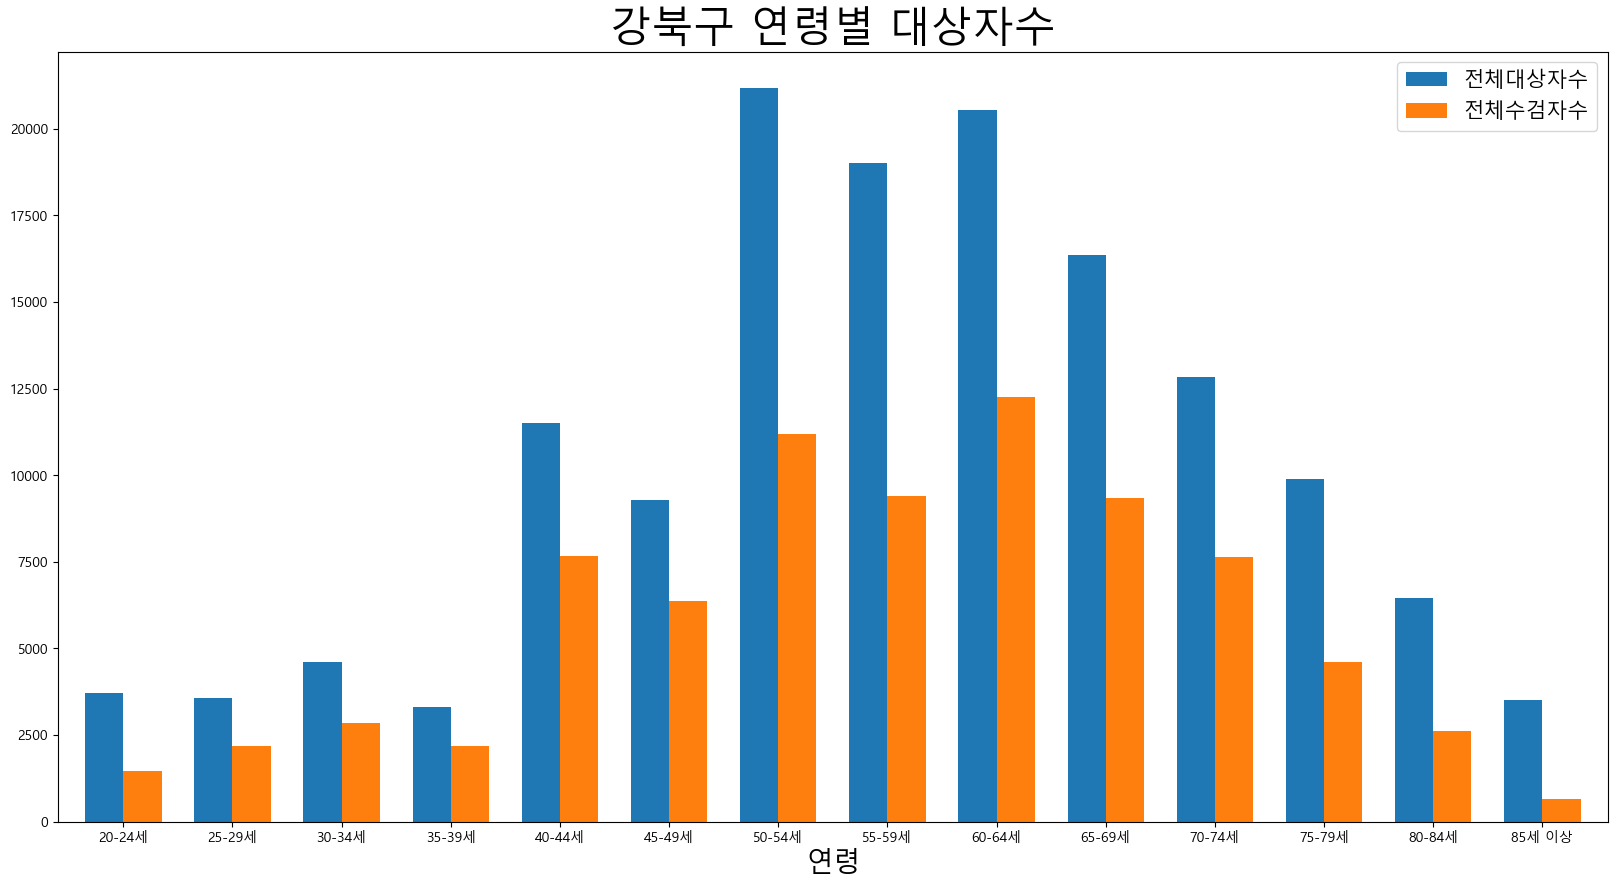

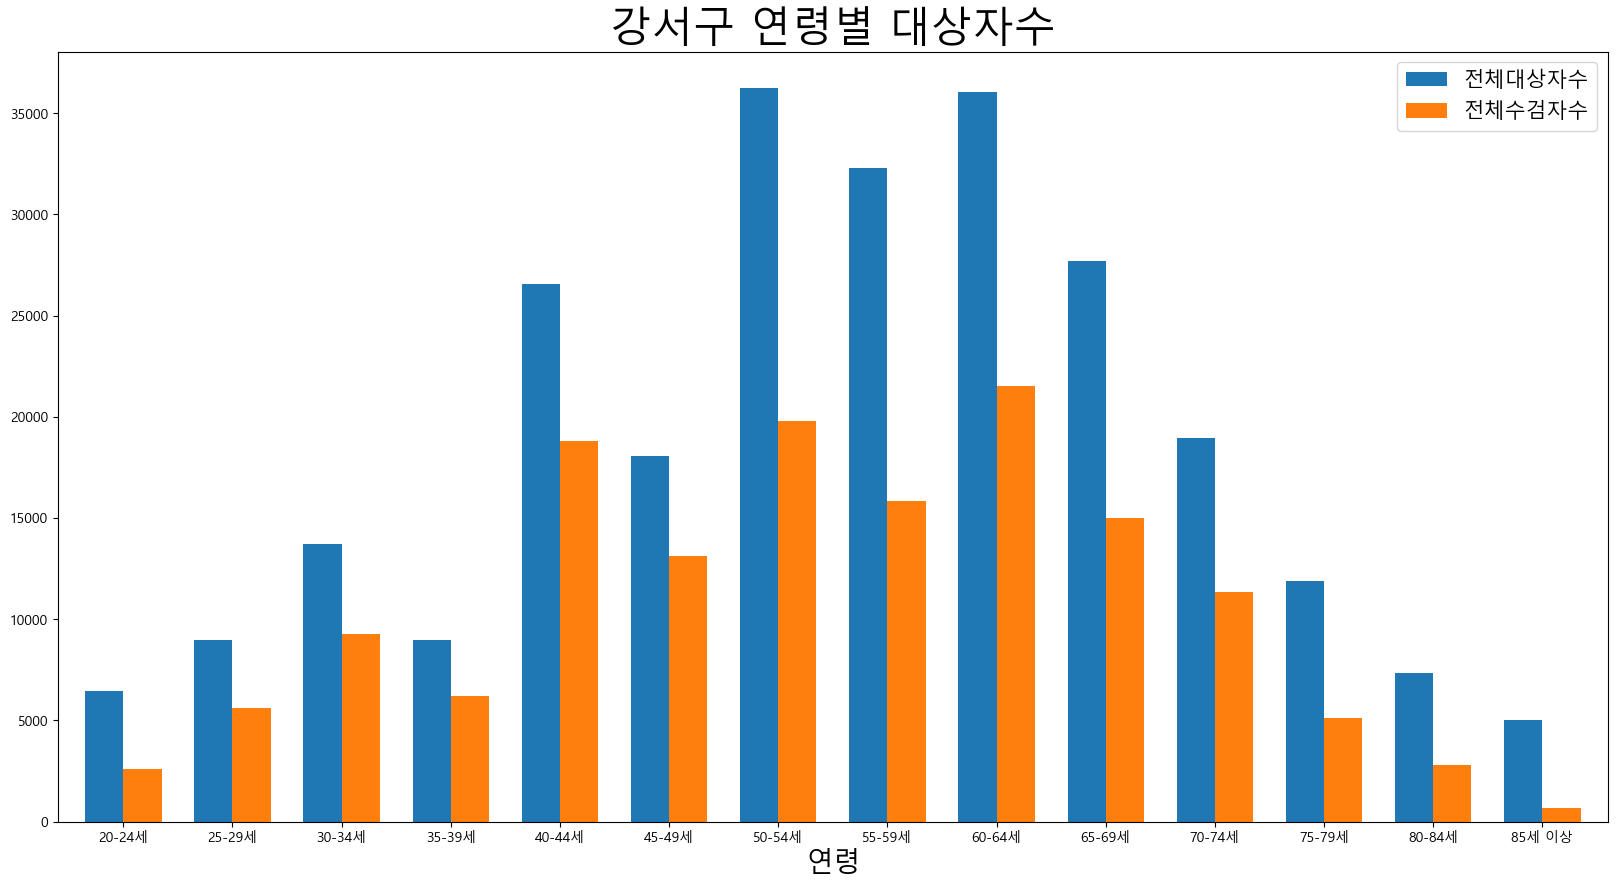

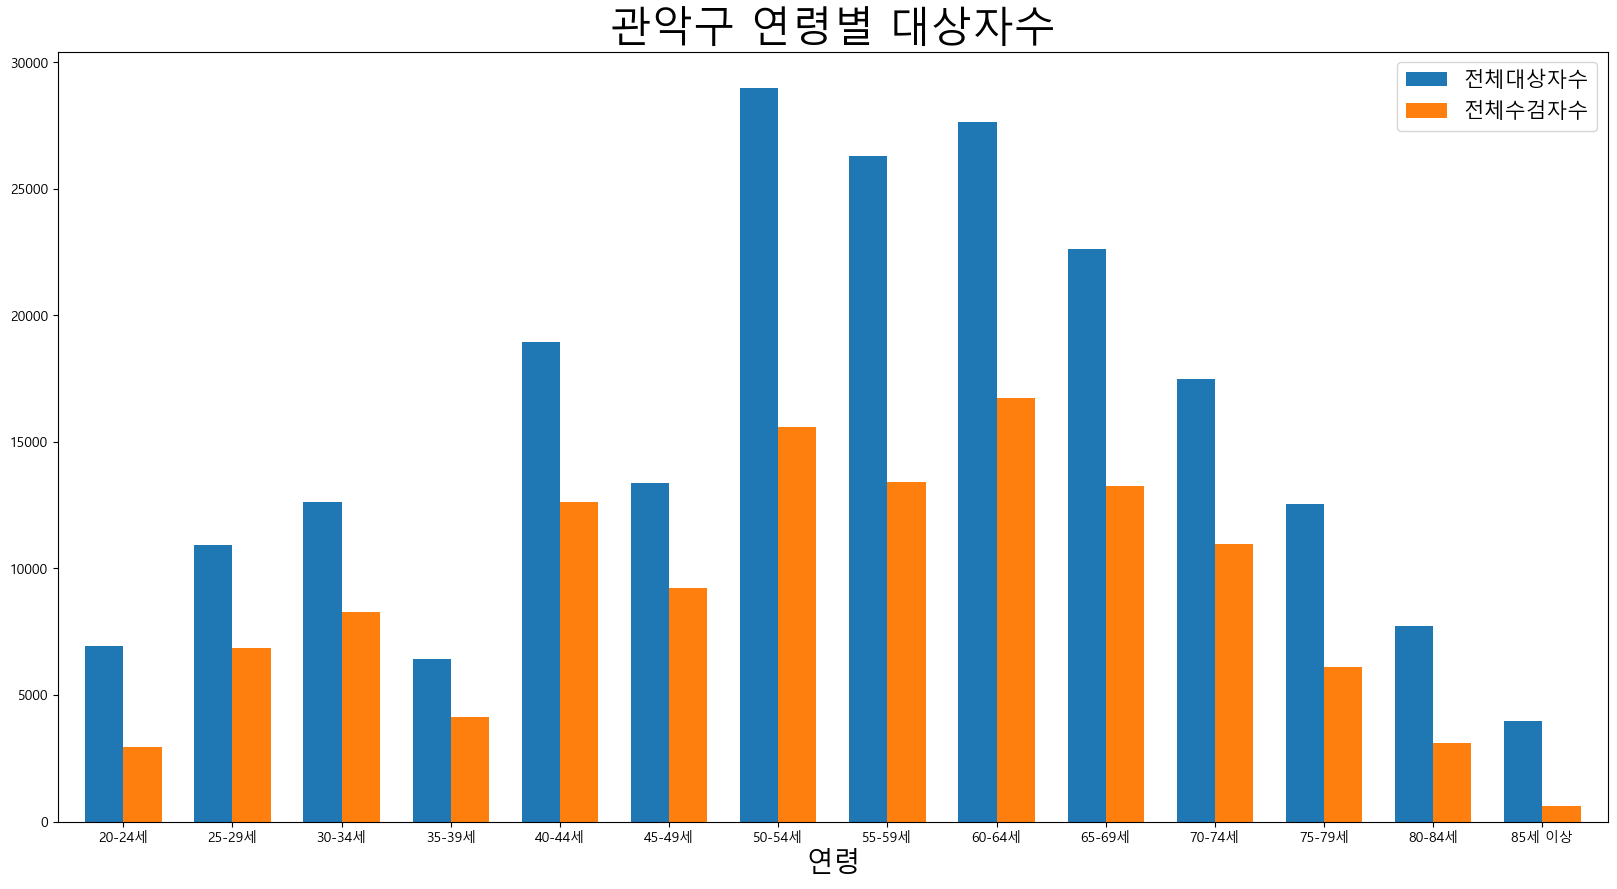

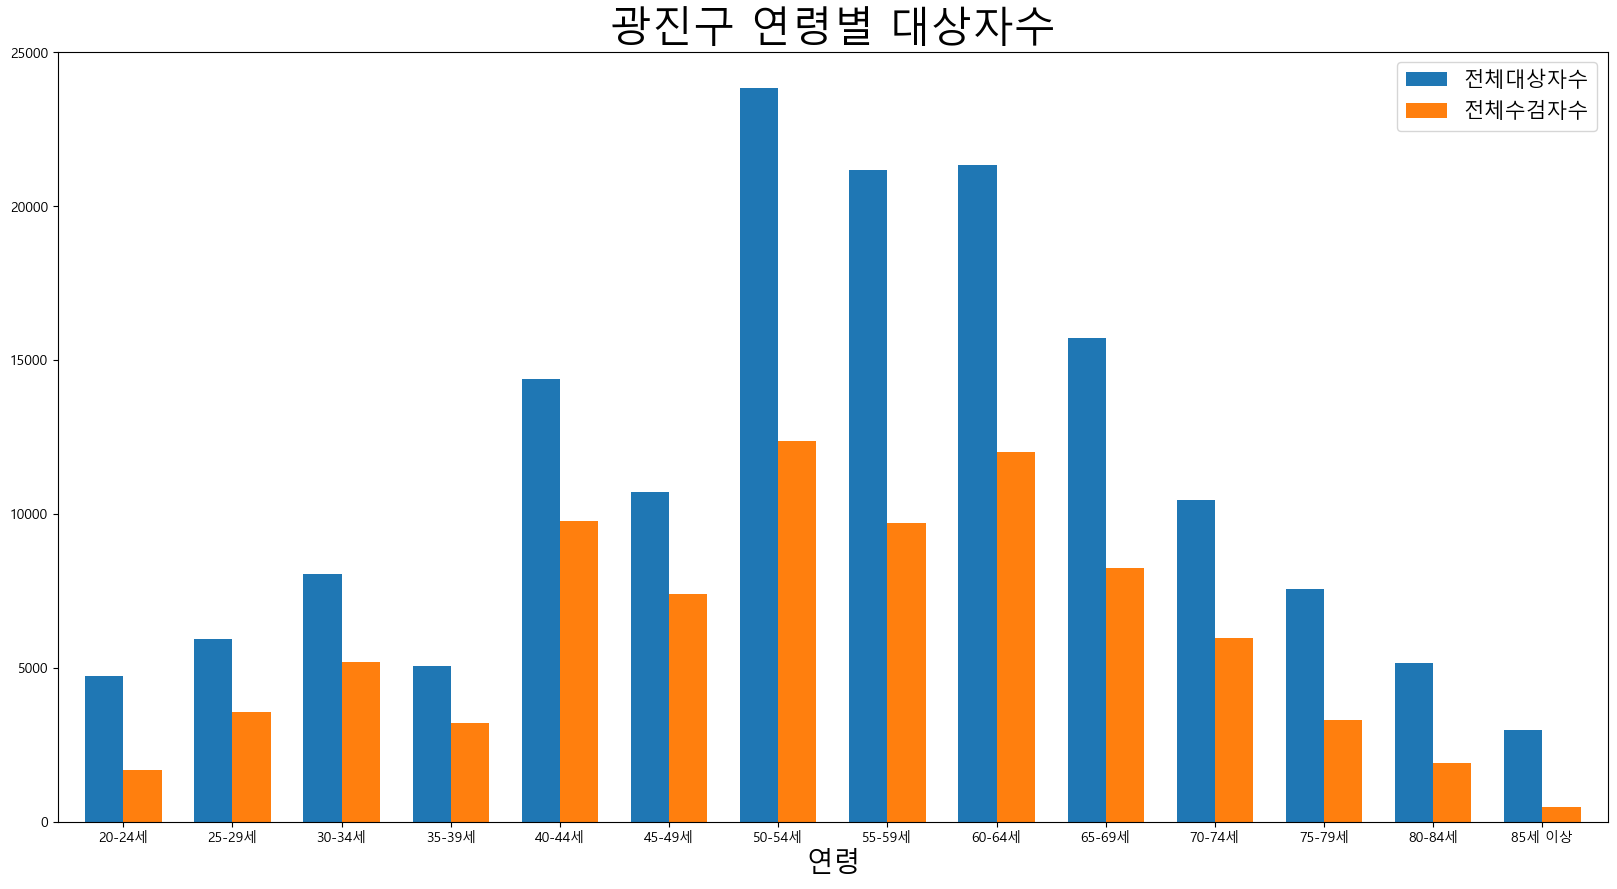

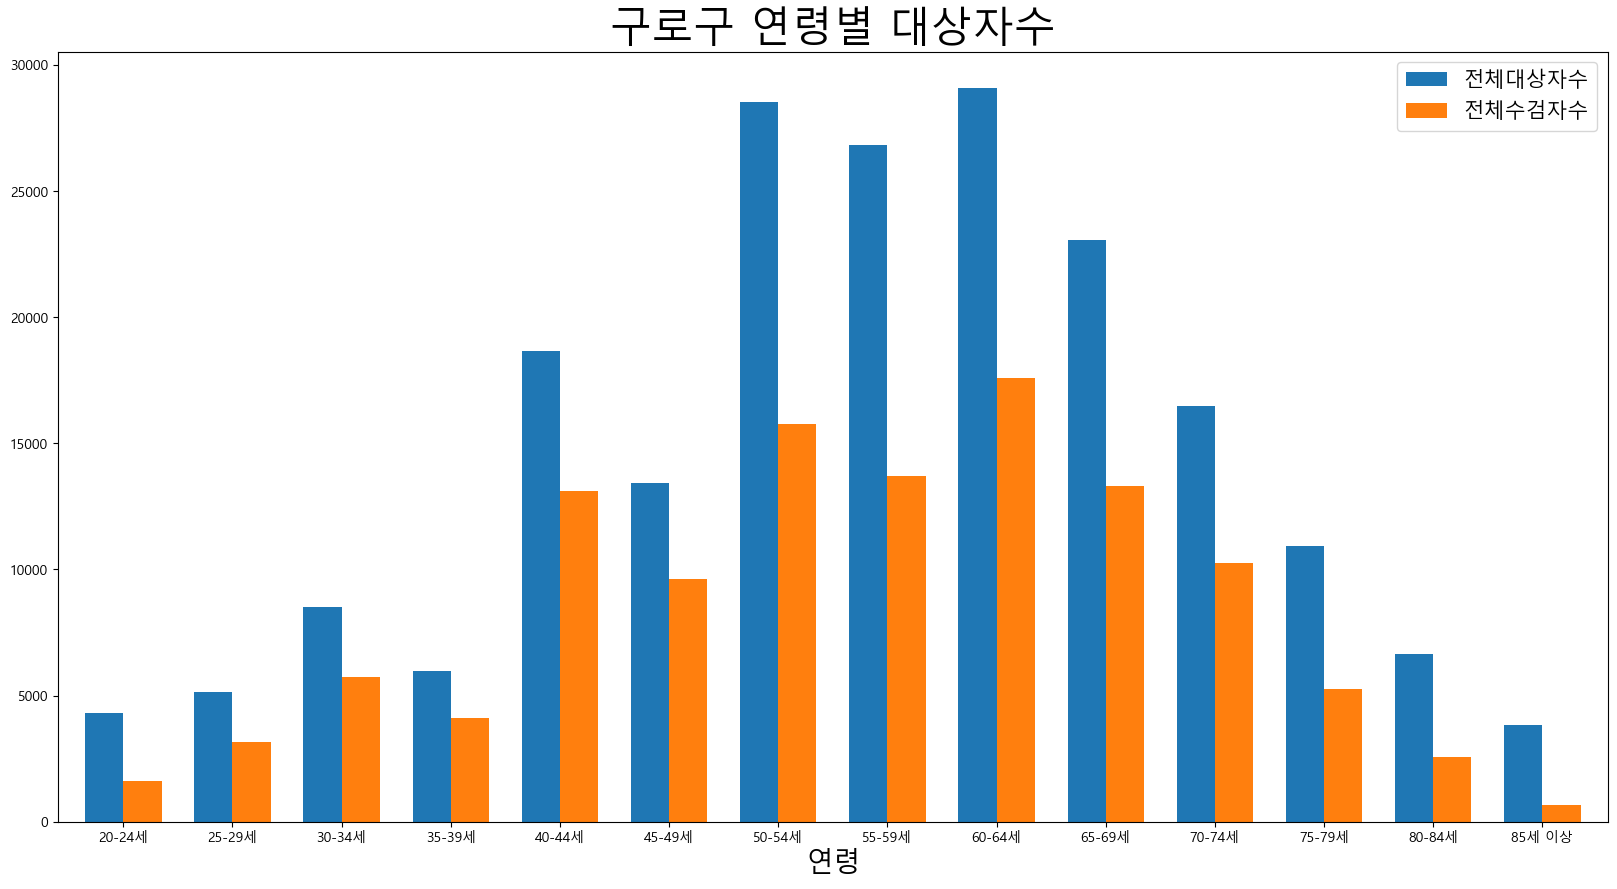

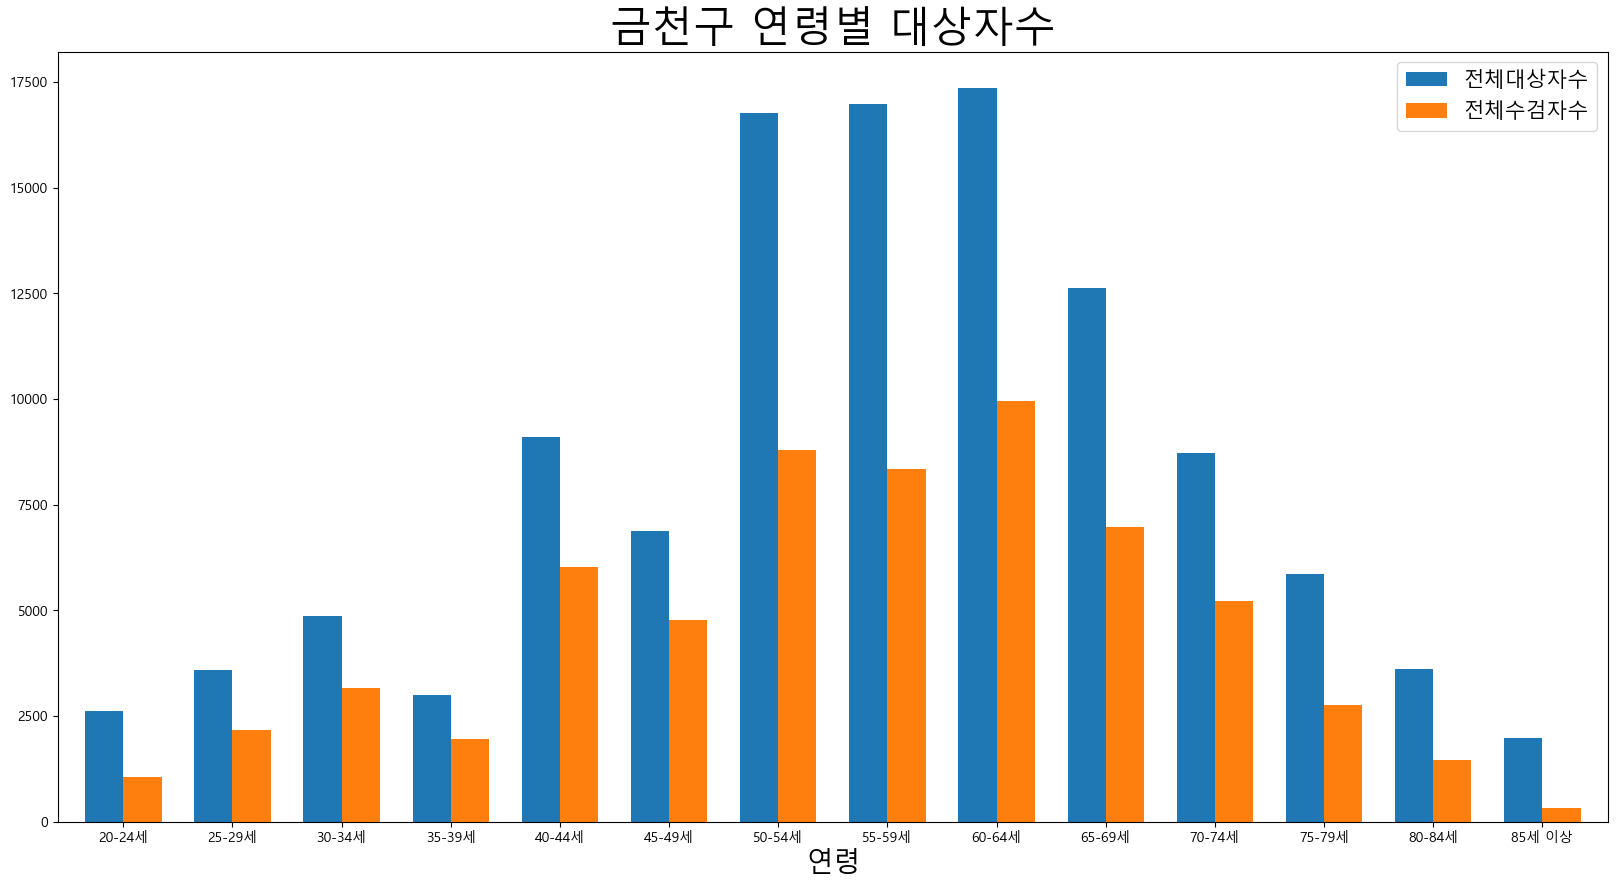

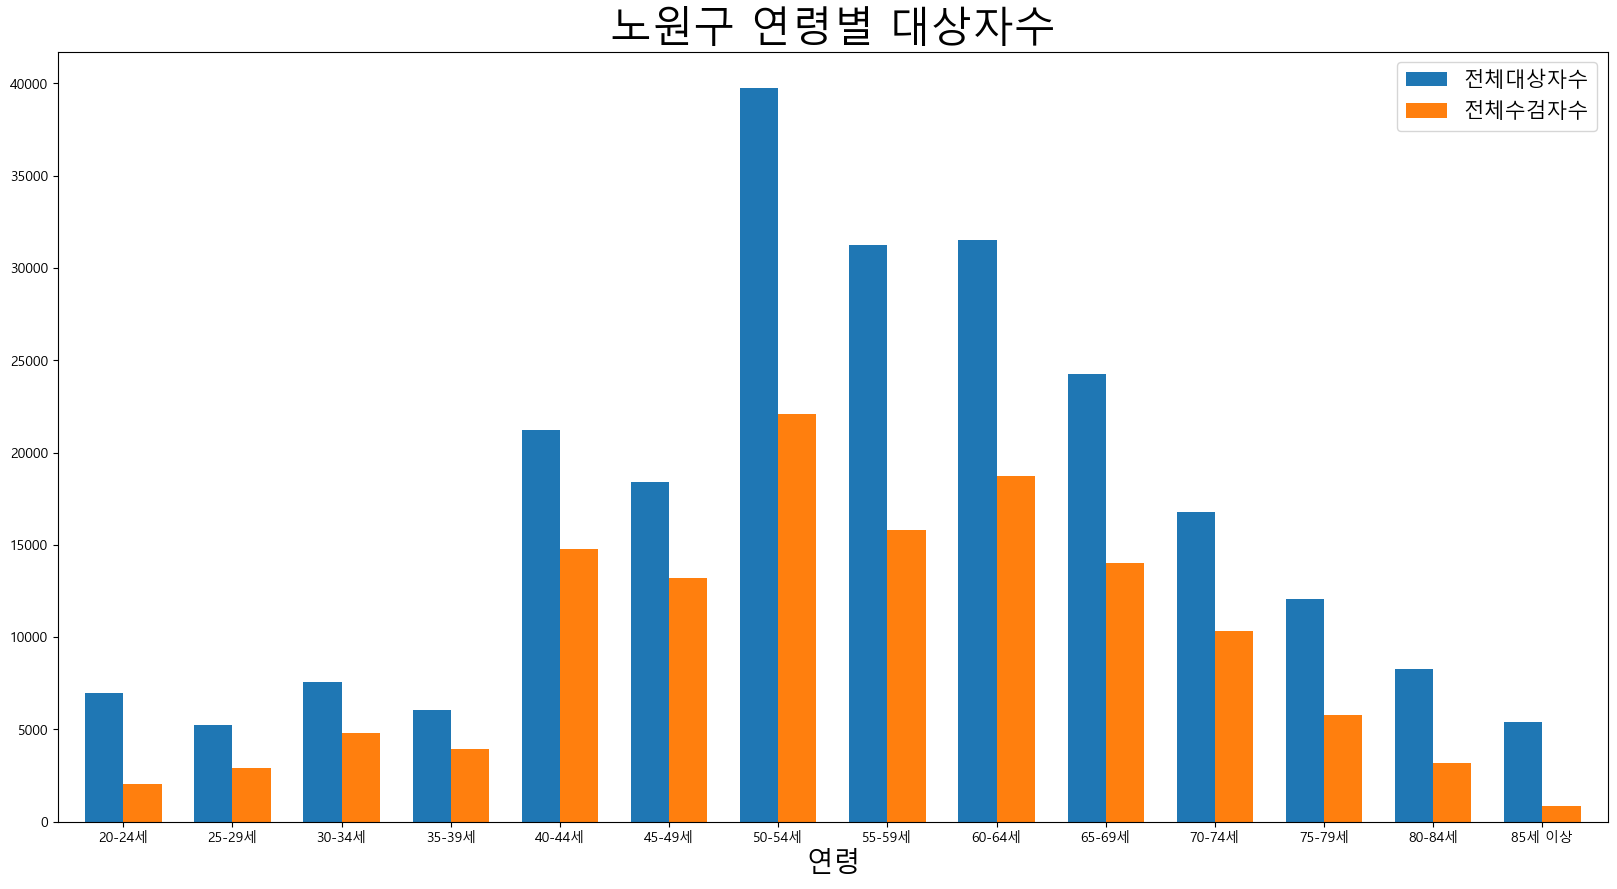

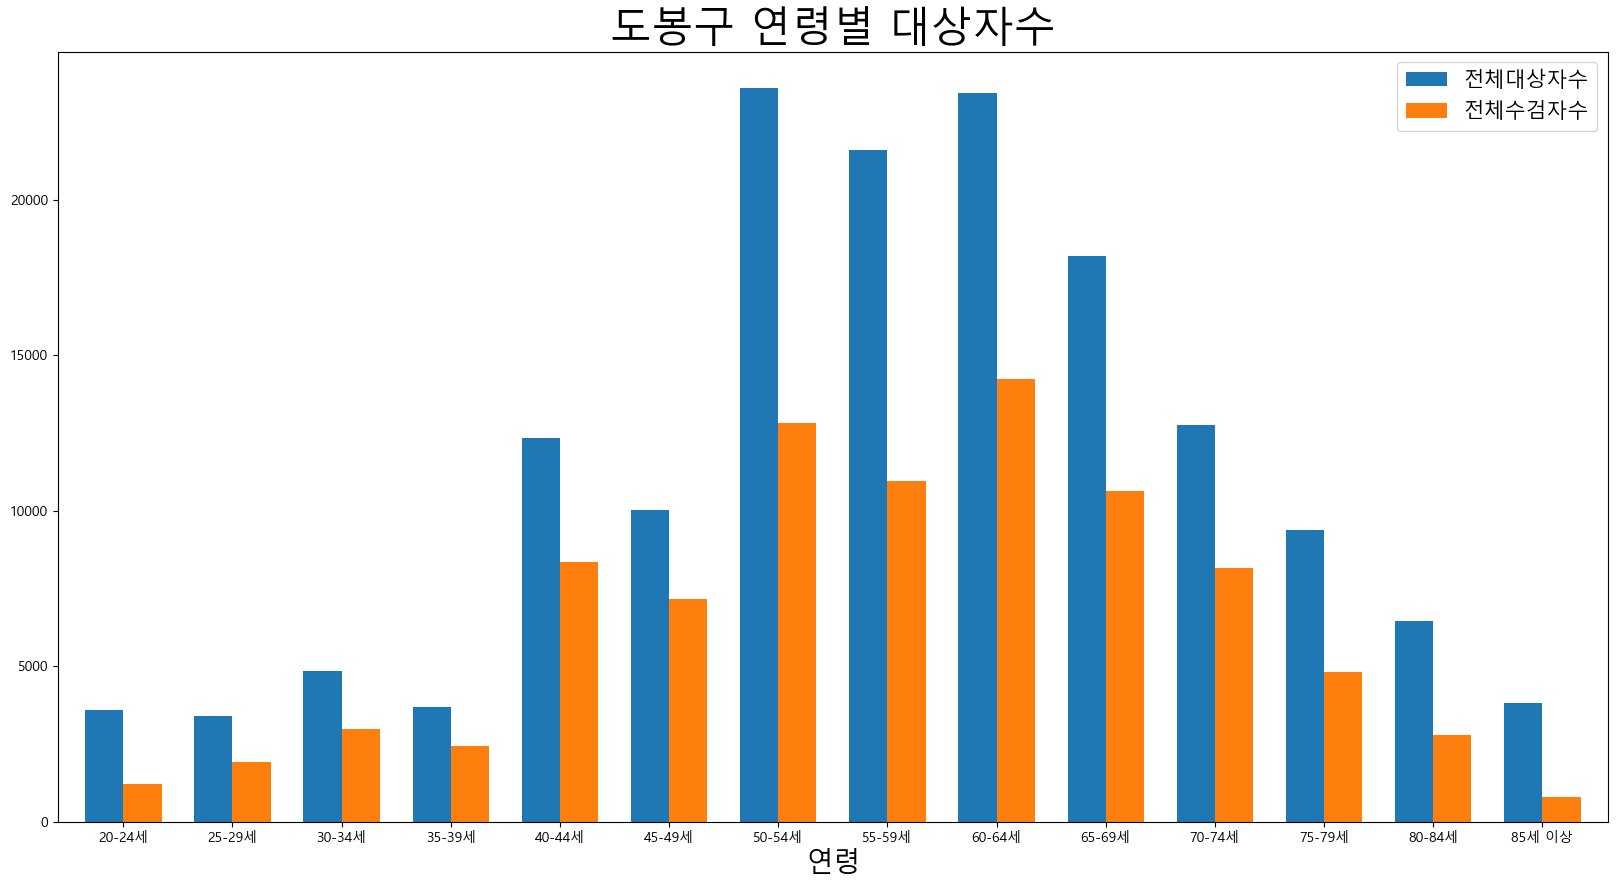

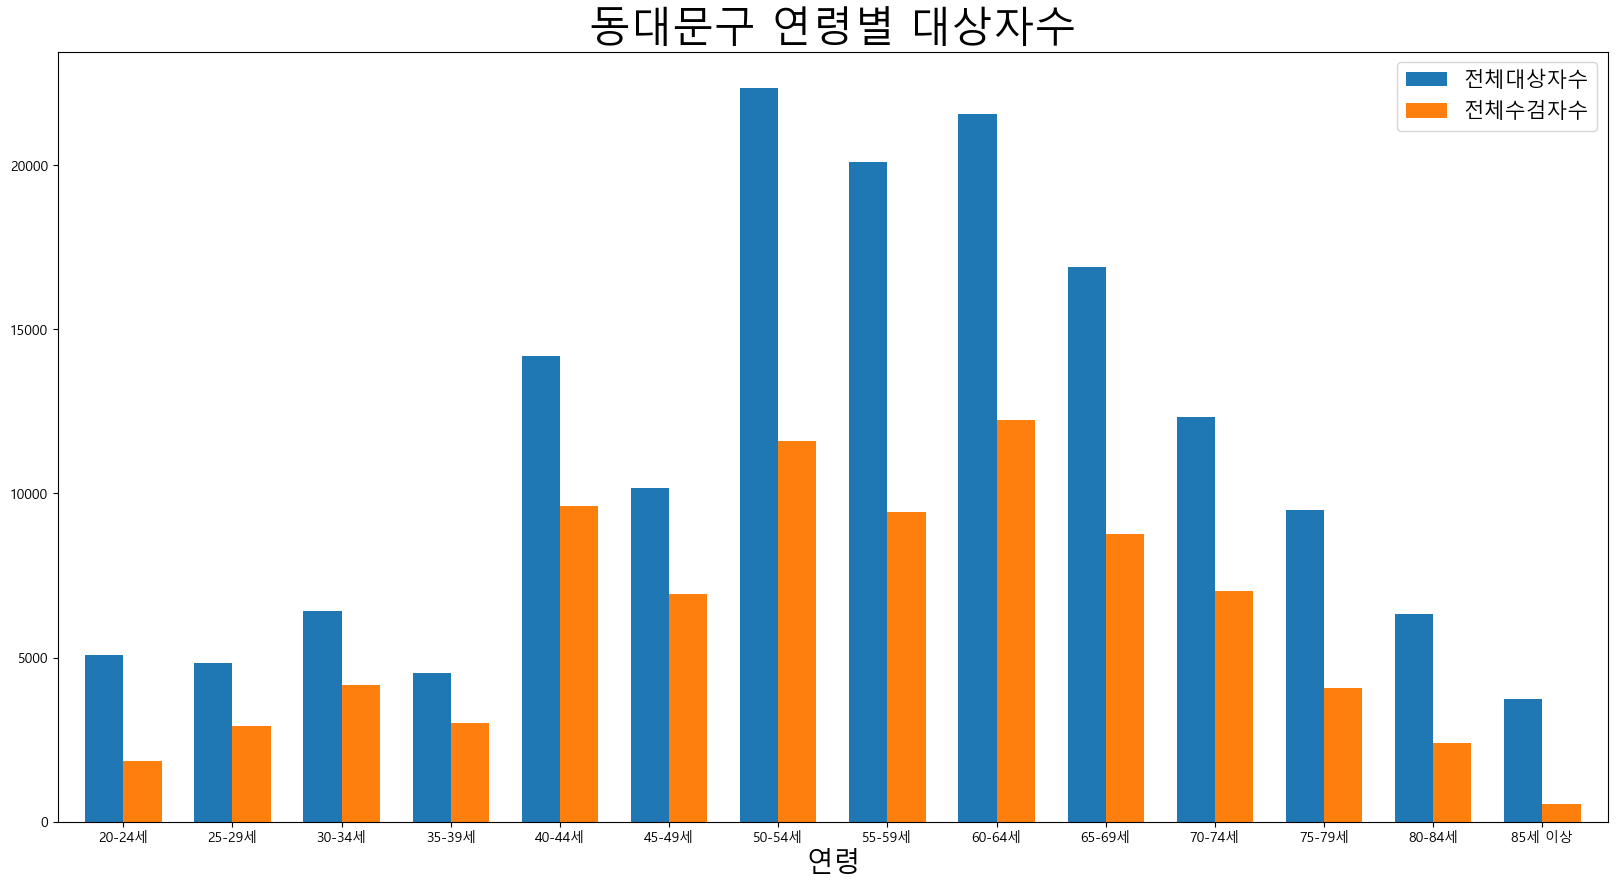

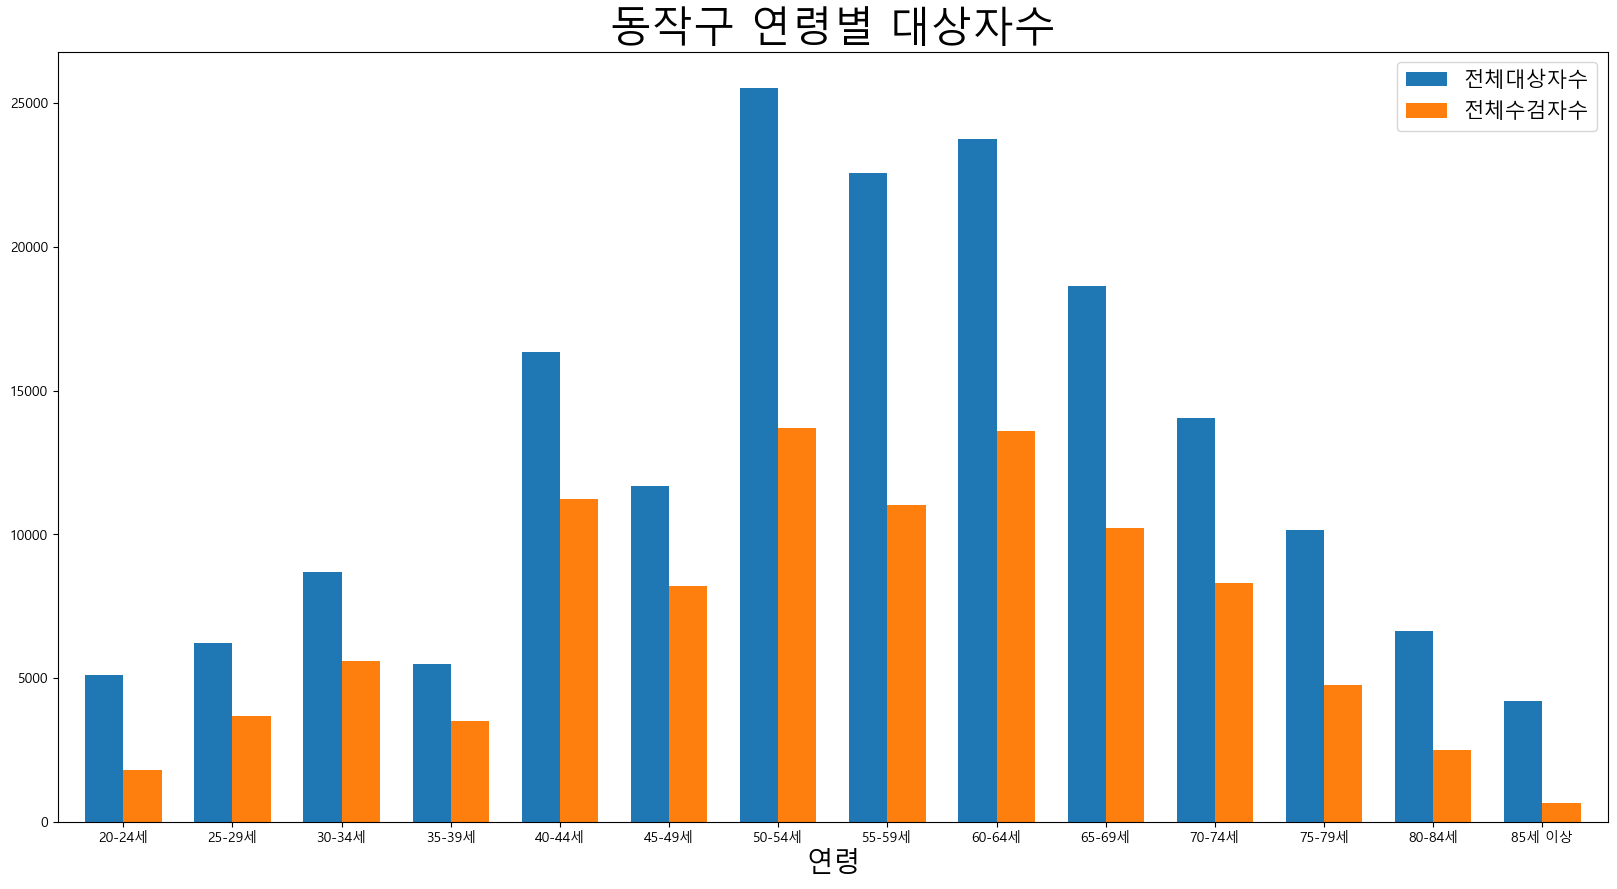

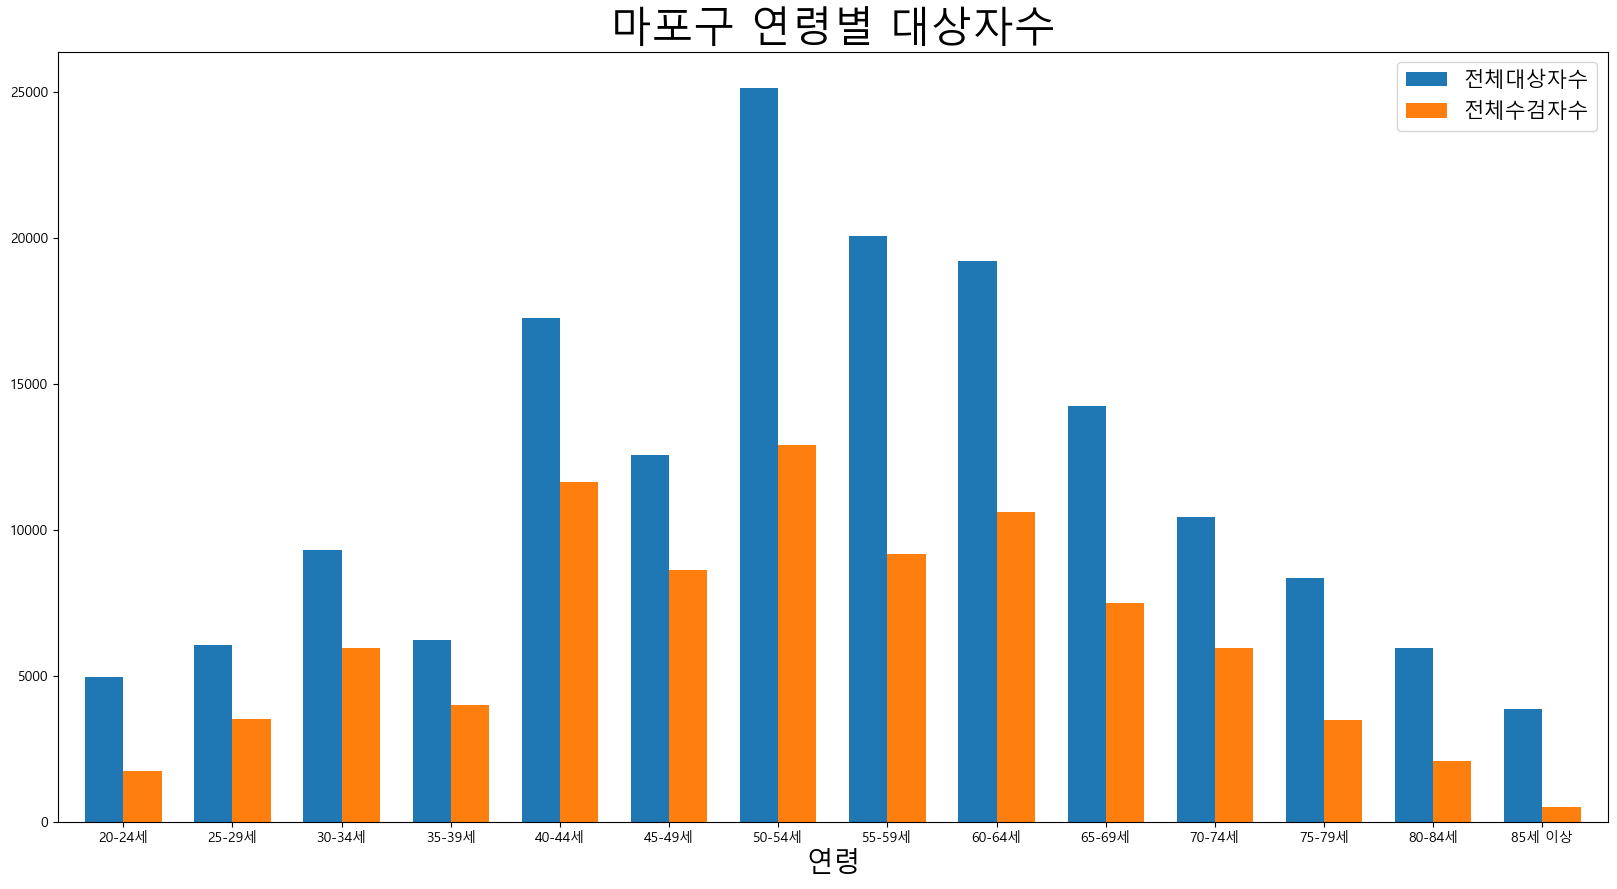

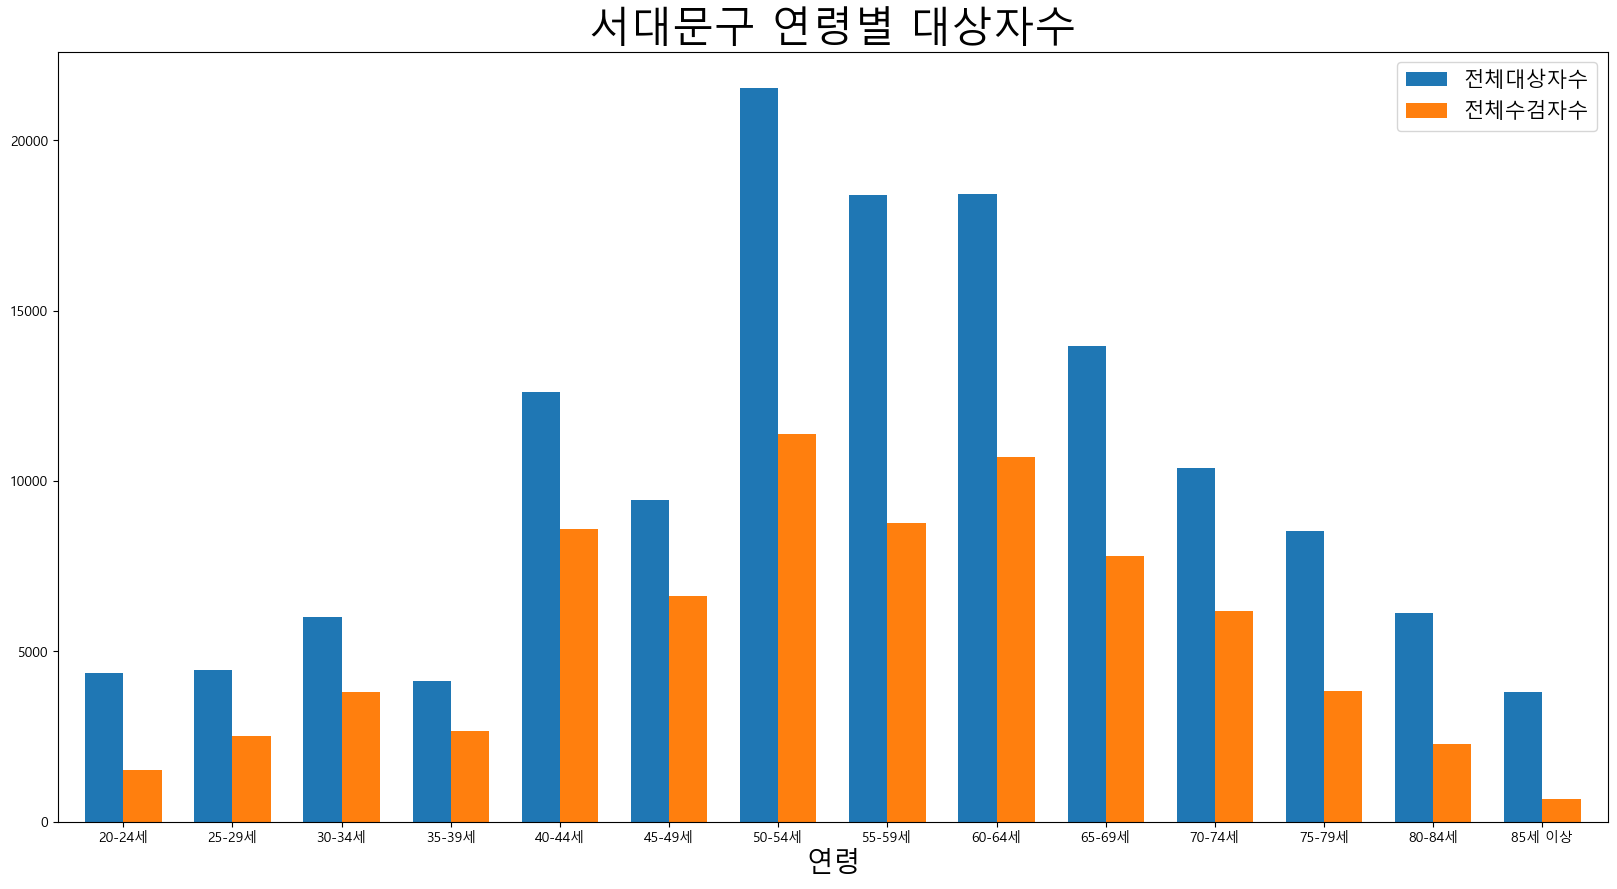

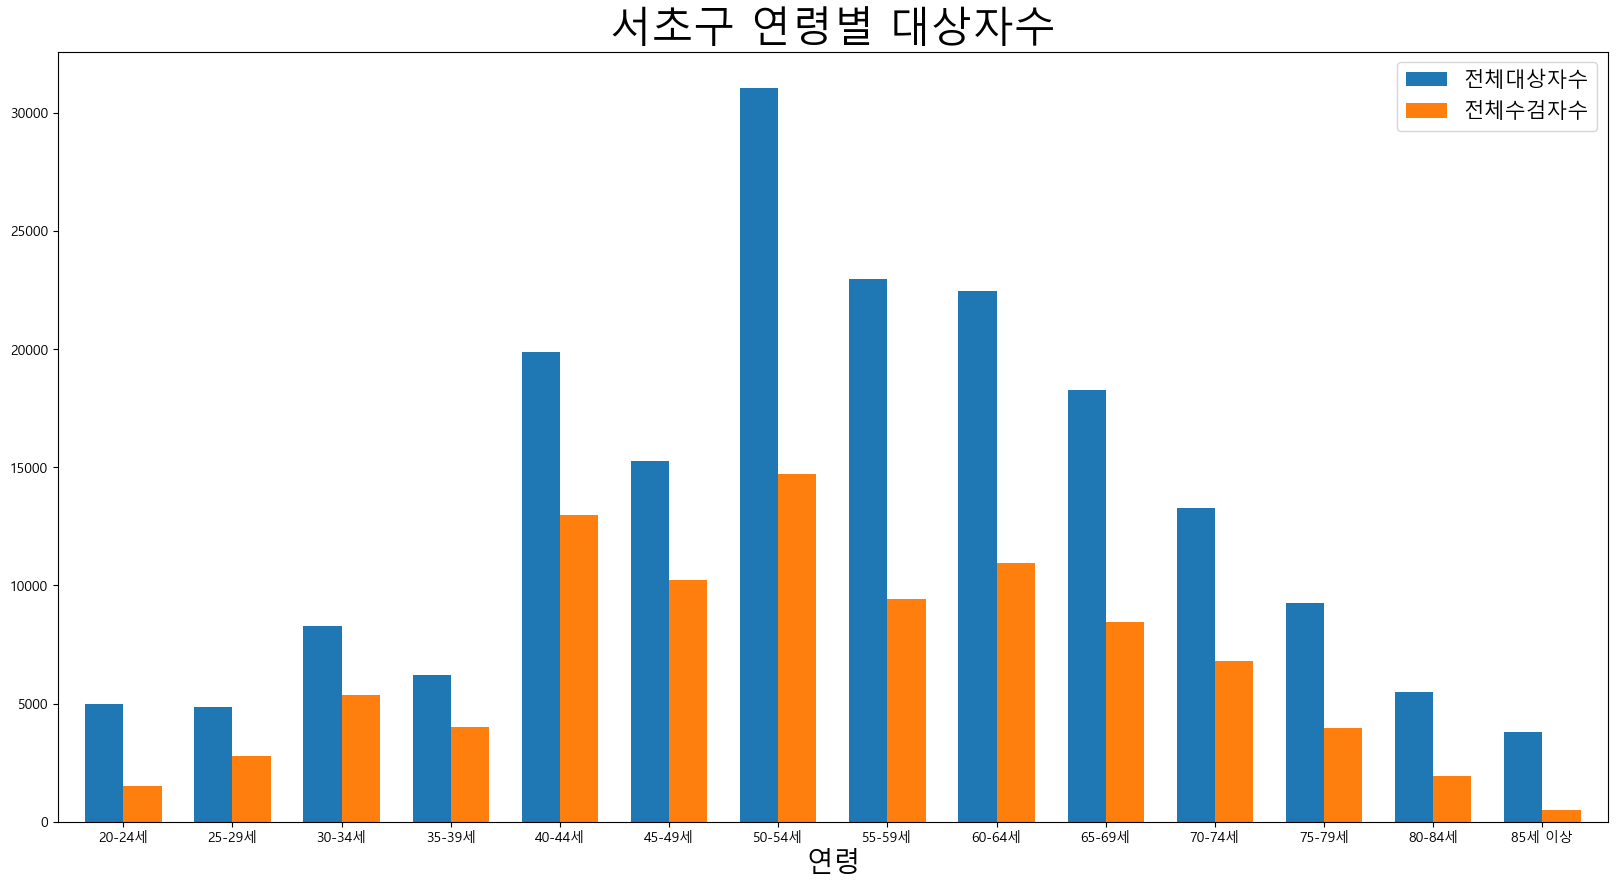

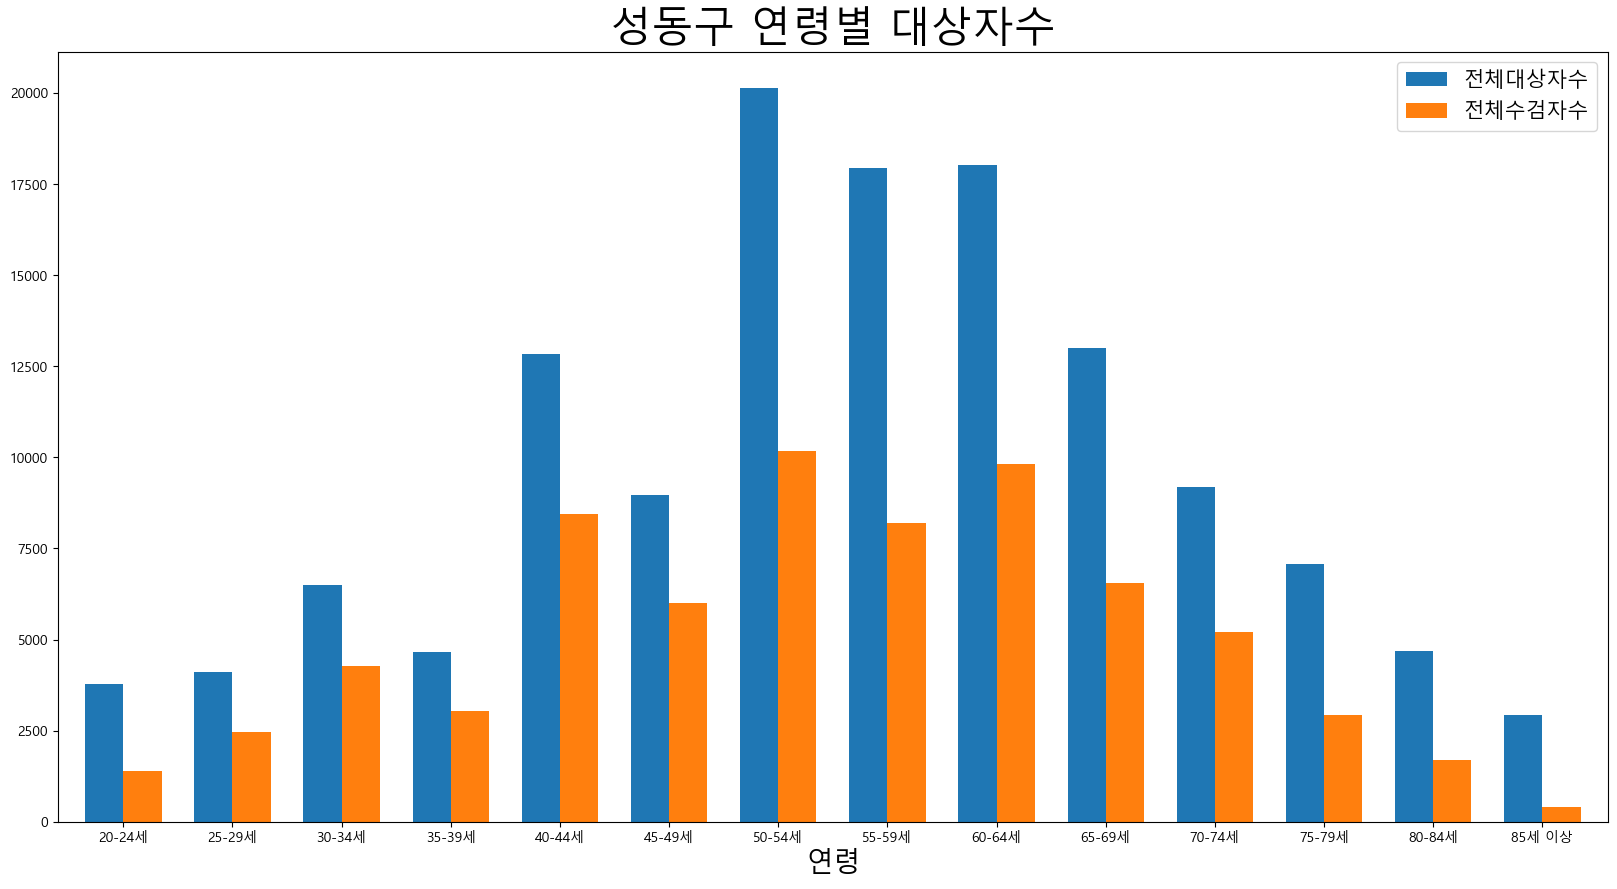

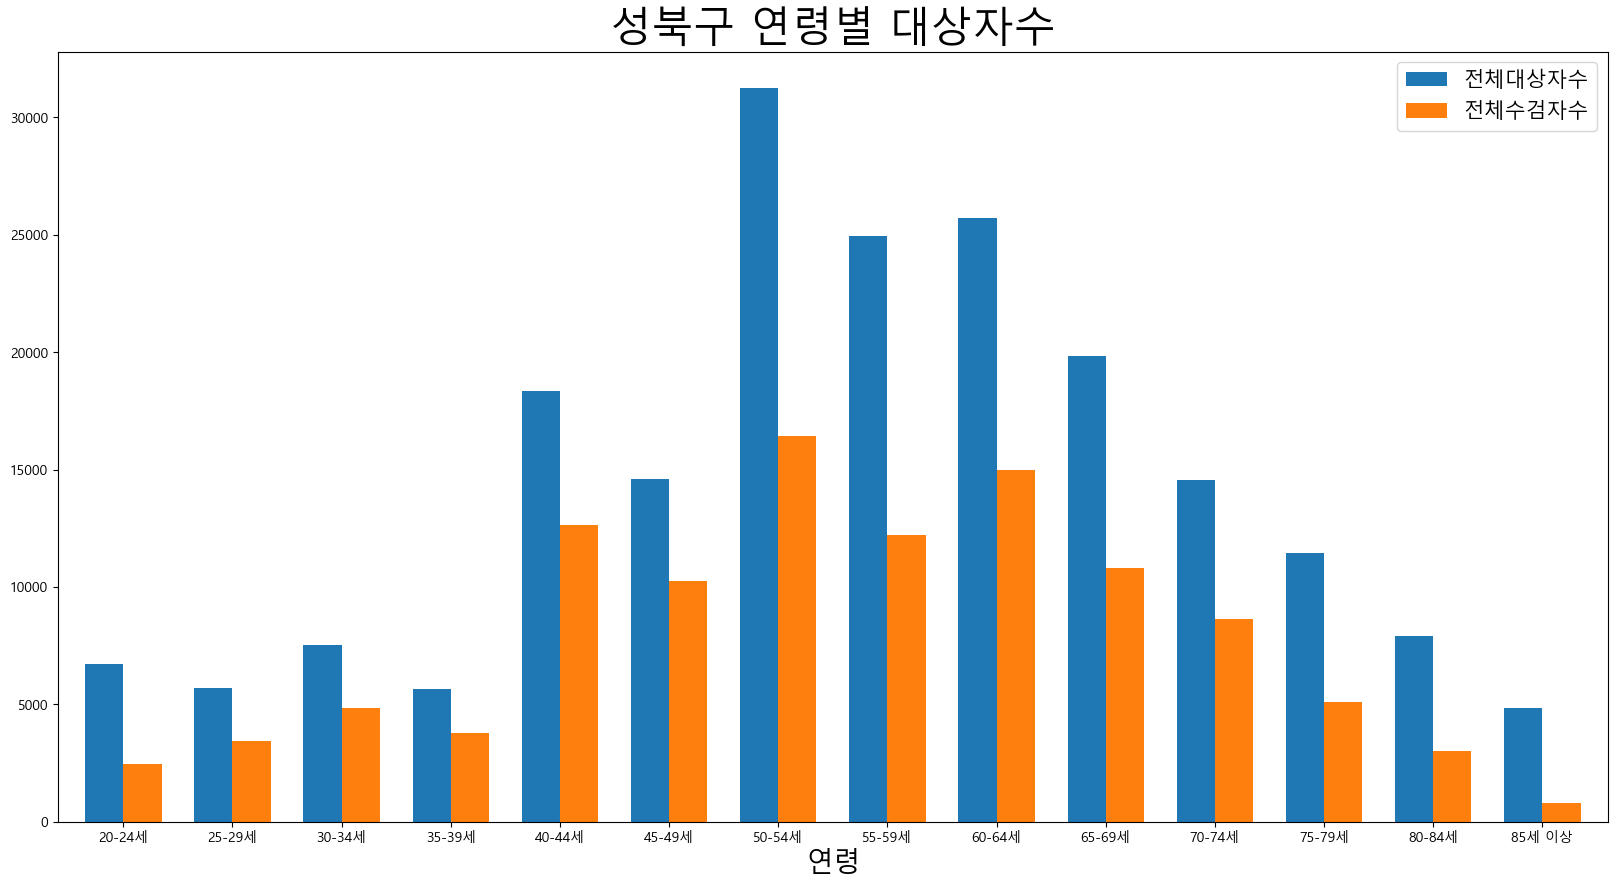

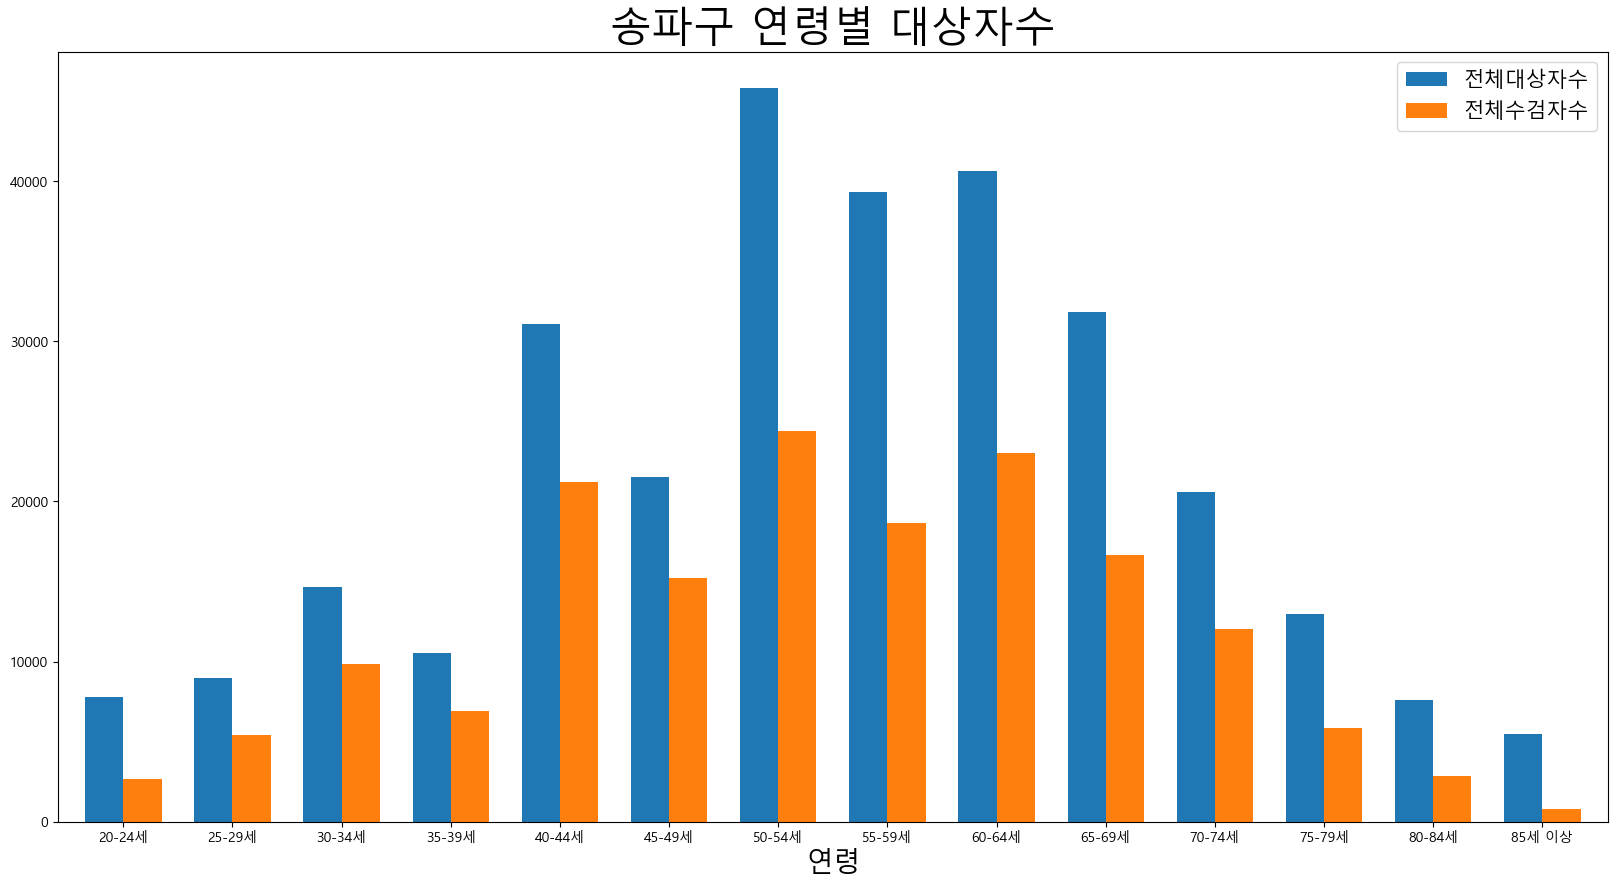

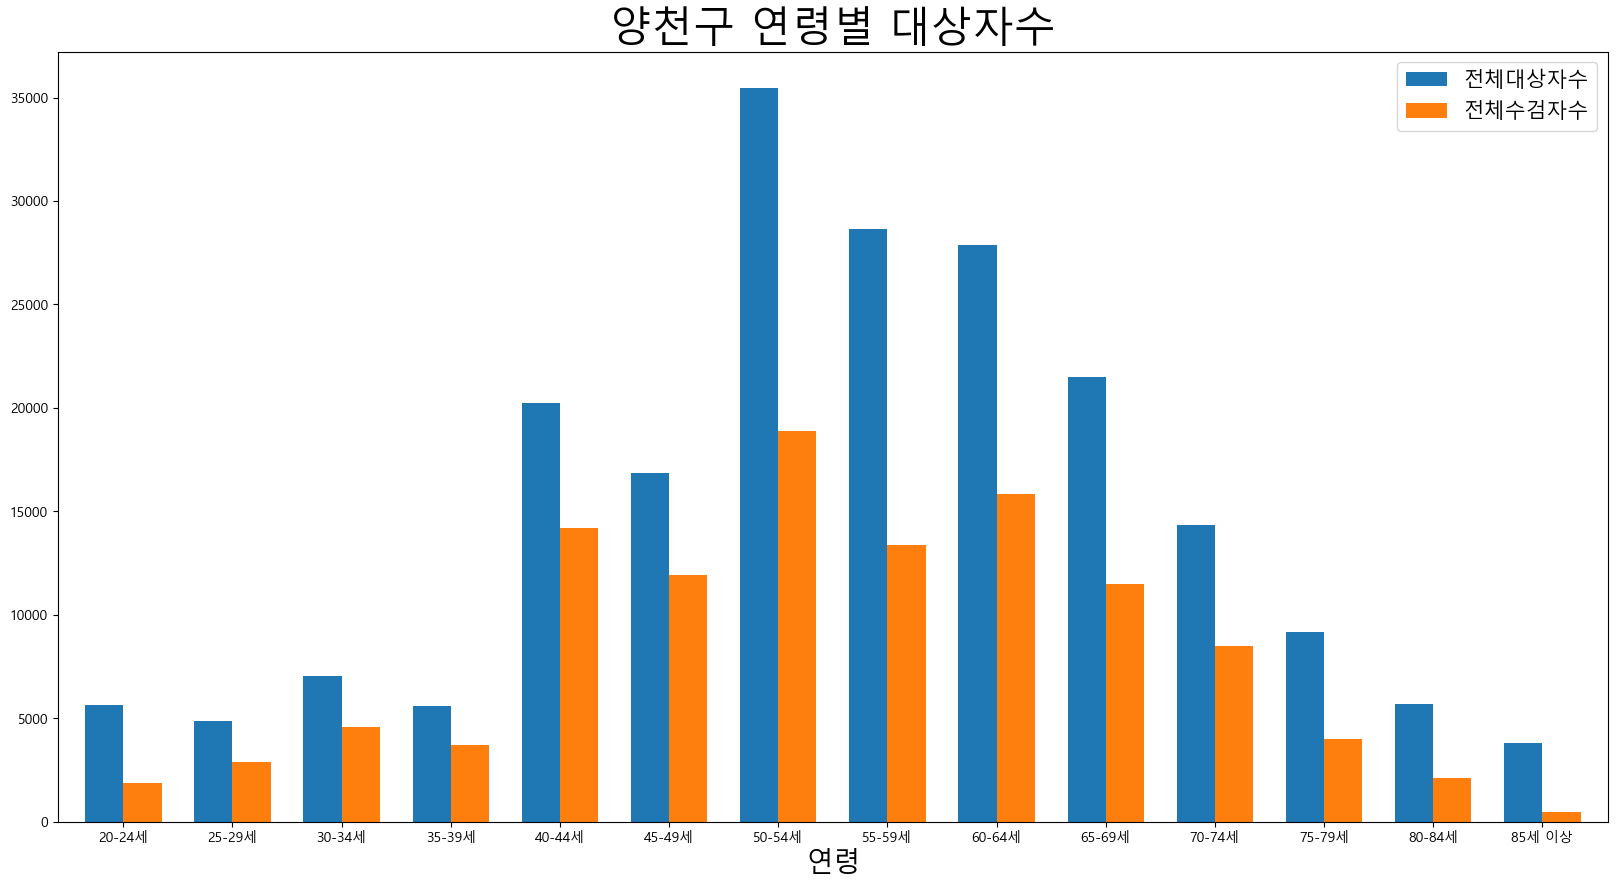

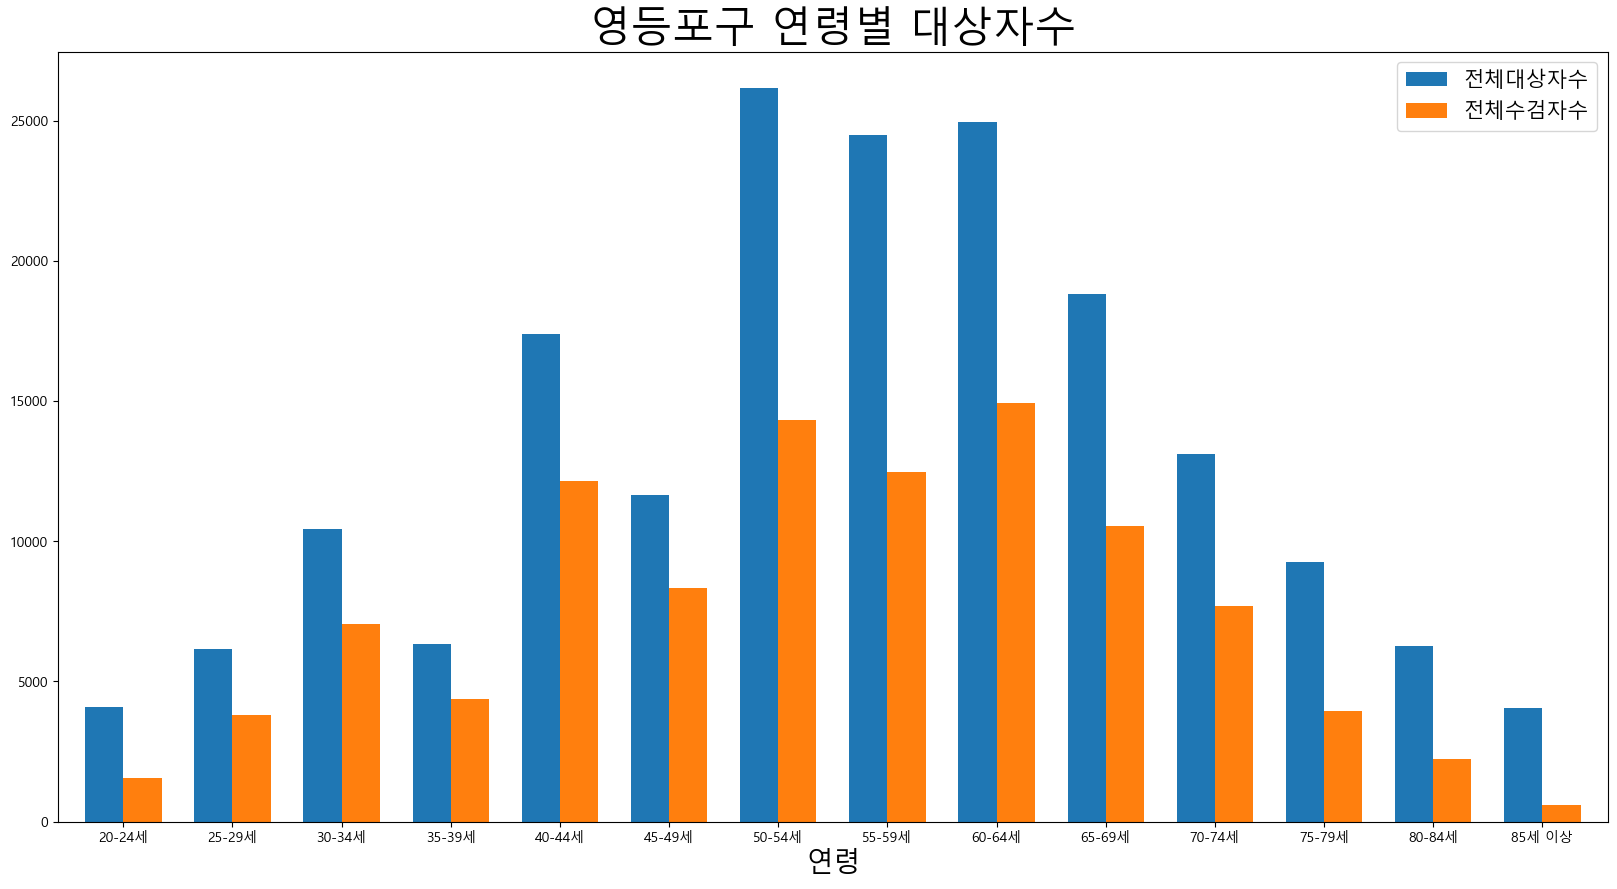

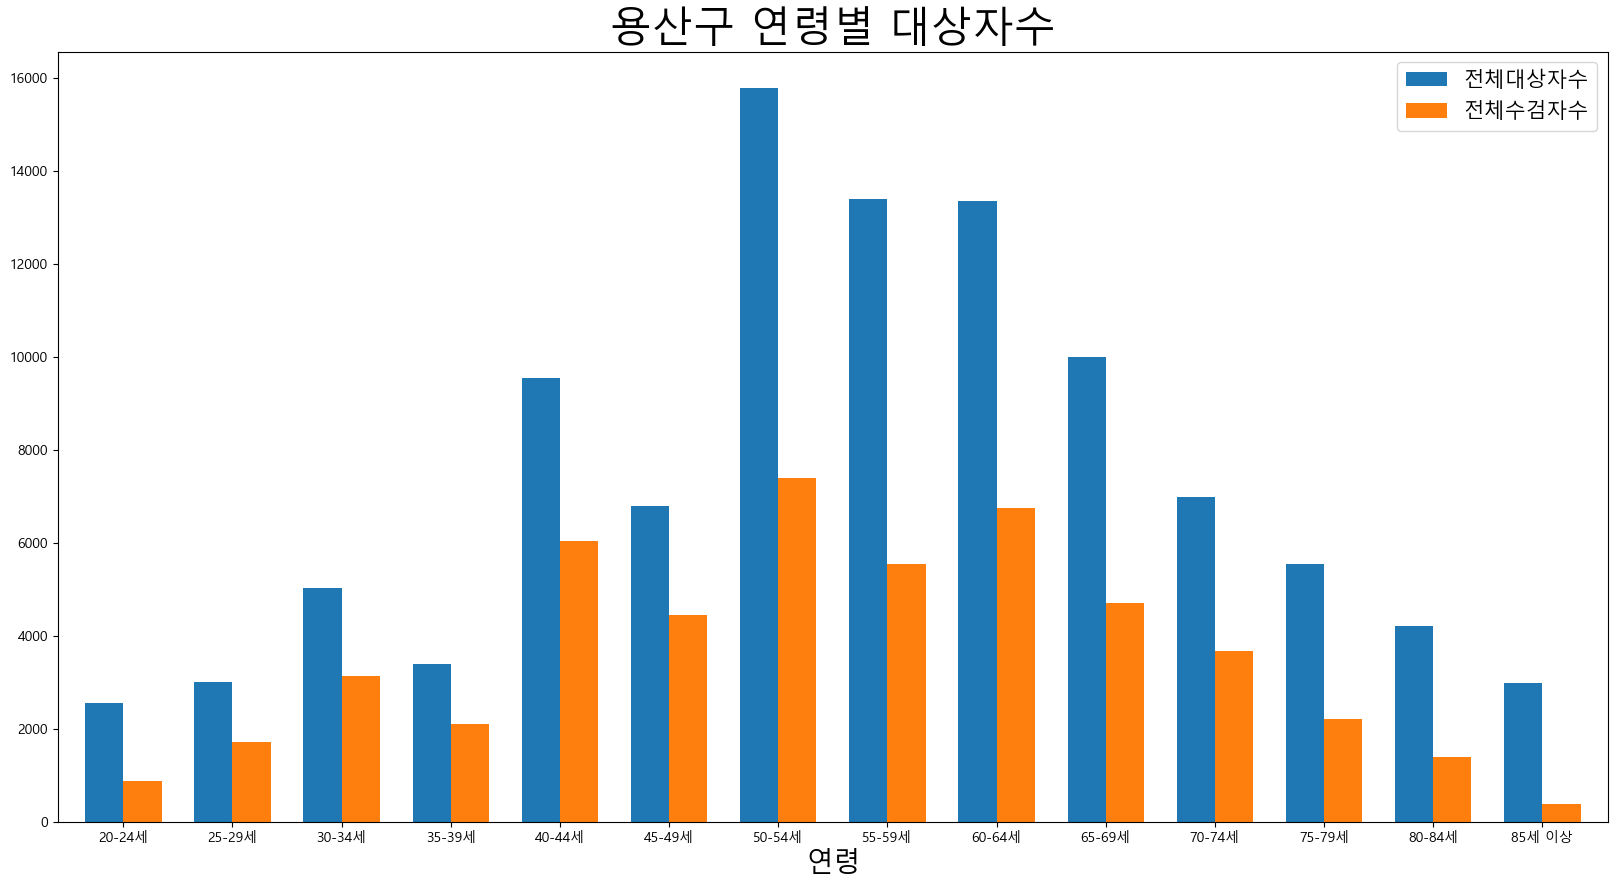

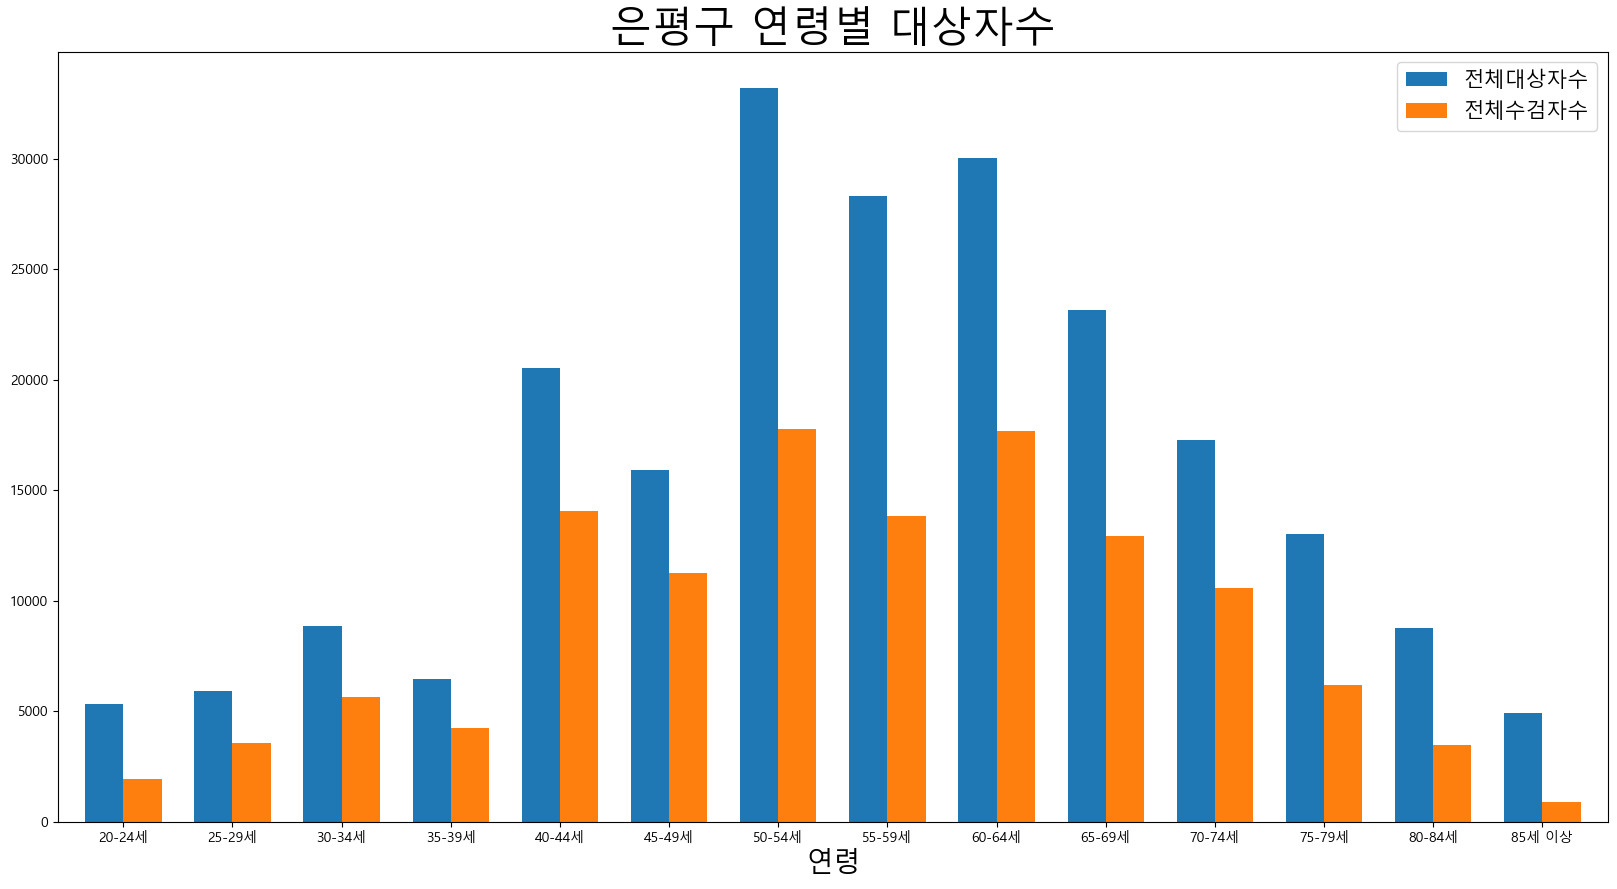

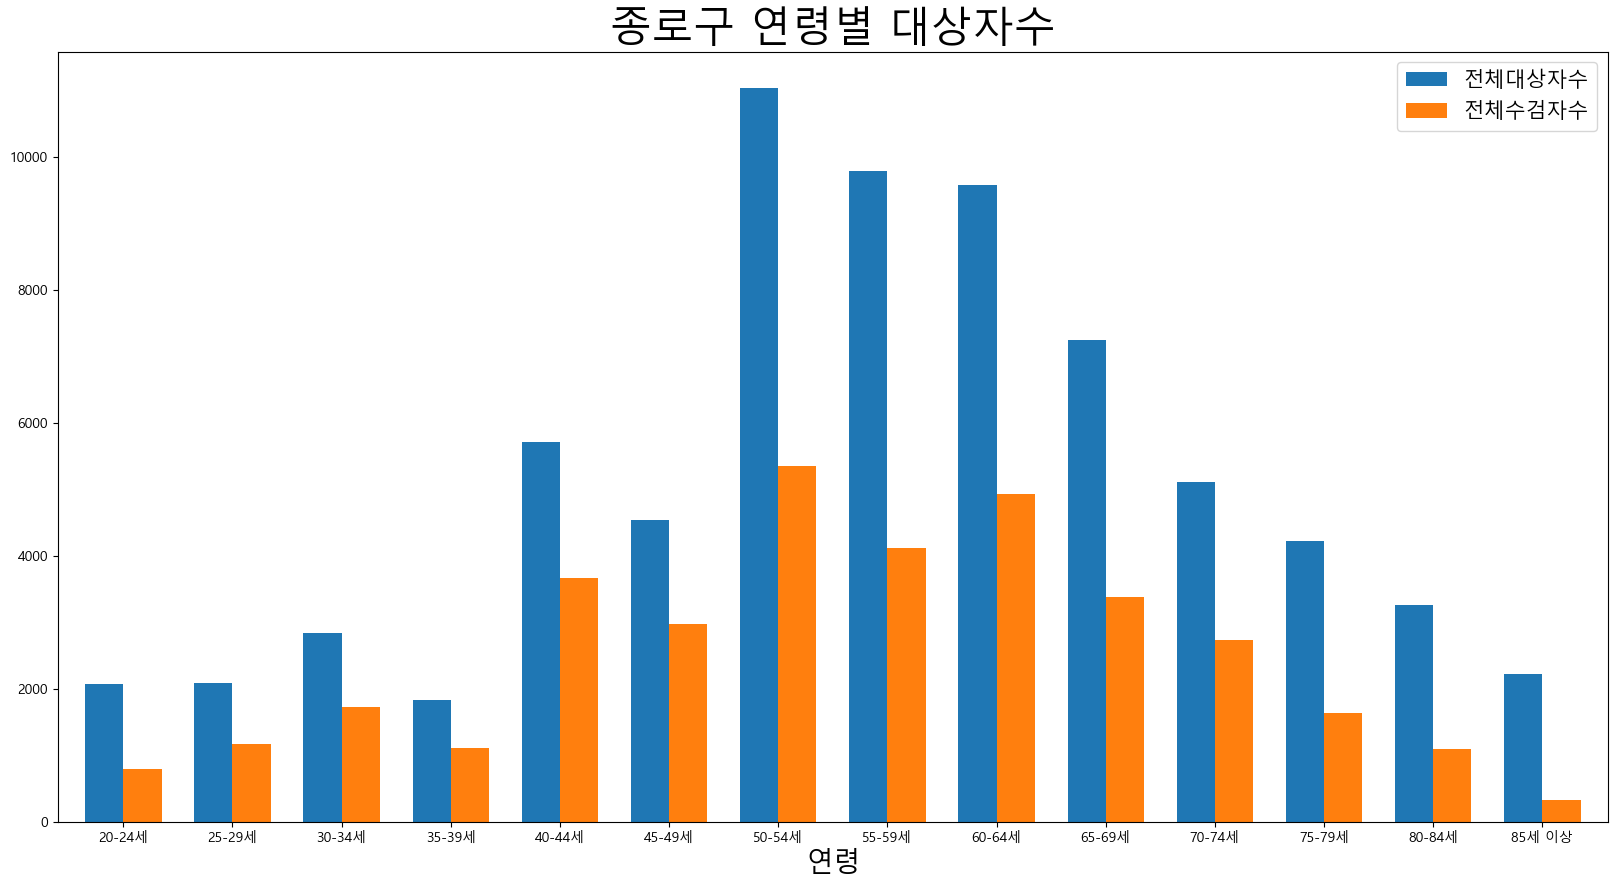

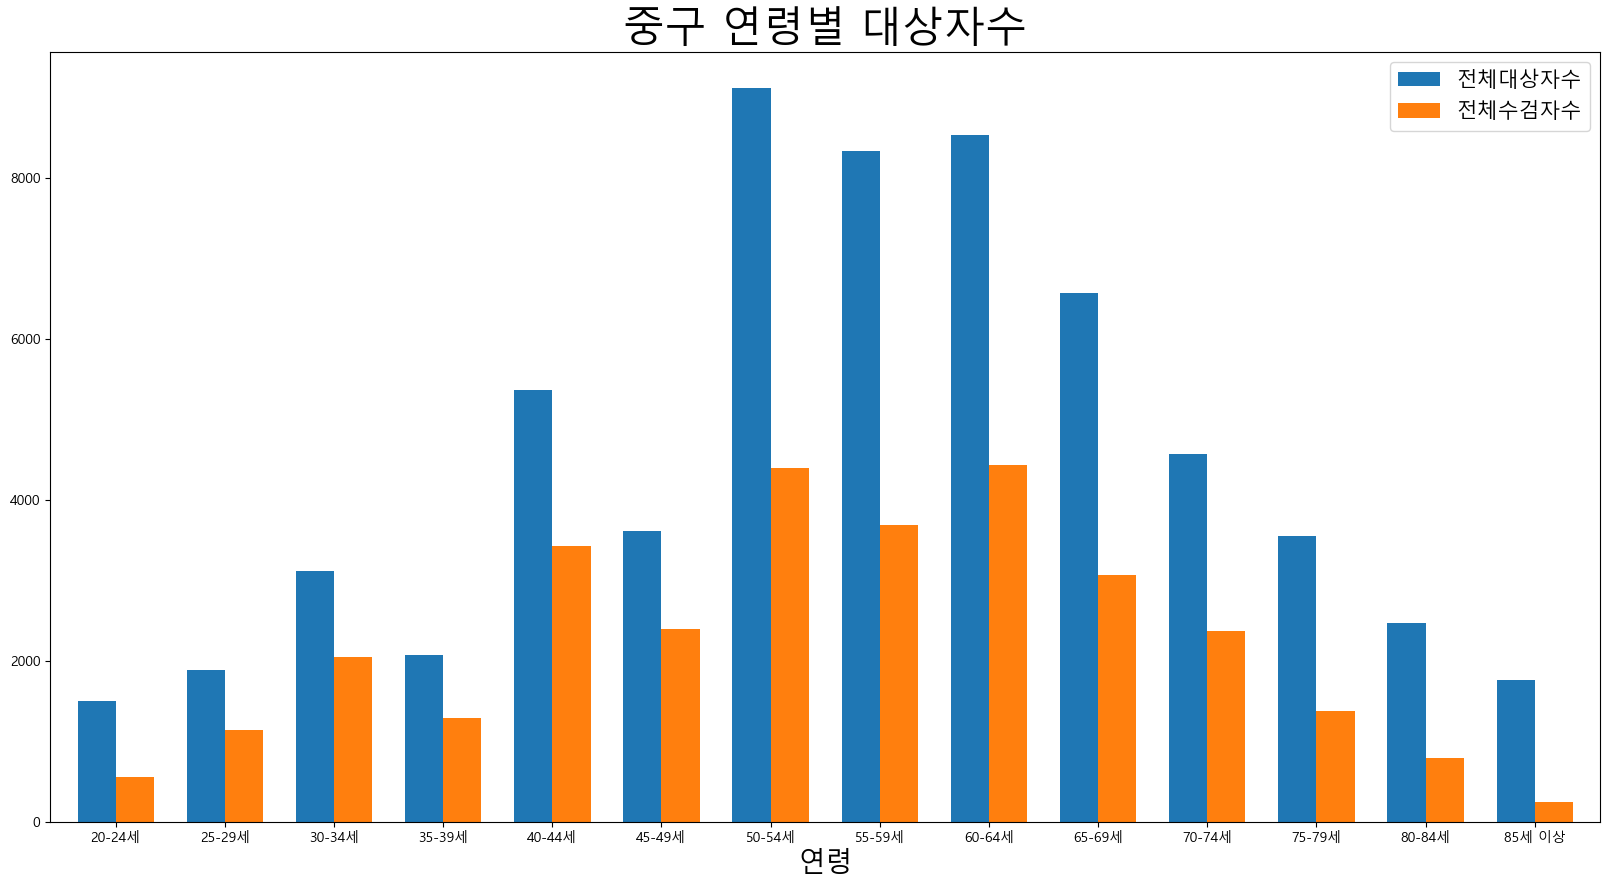

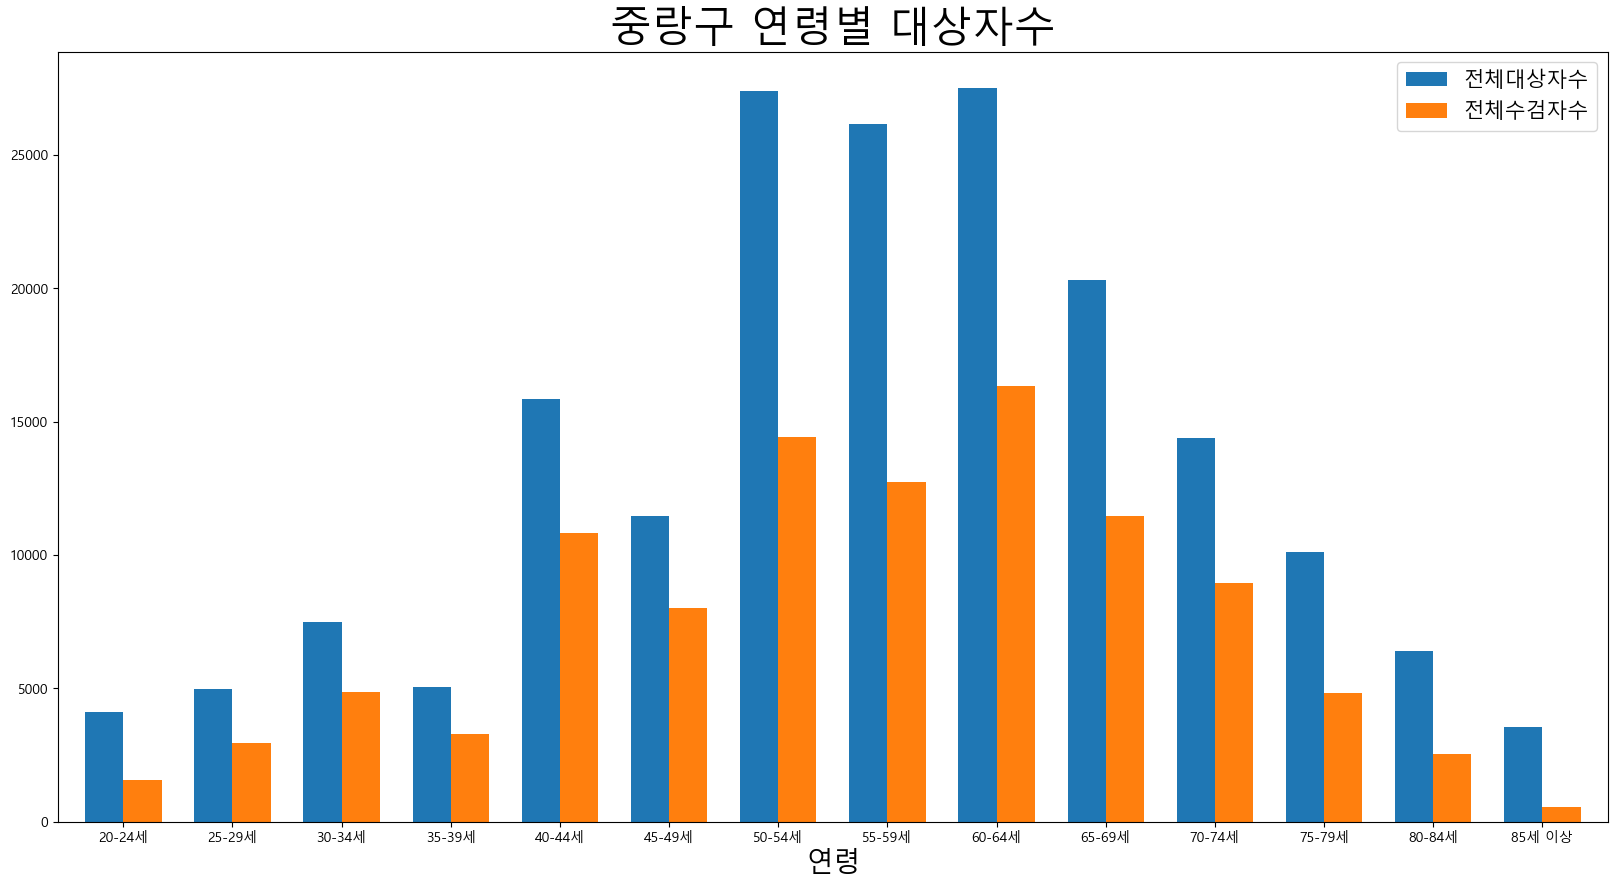

In [34]:
# 막대 그래프 그리기
index_age.plot(kind = "bar", figsize = (20, 10), width = 0.7, rot = 360)

for i in age_data["시군구"].unique():
    age_test = age_data[age_data["시군구"] == i]
    index_age = age_test.set_index("연령")
    index_age = index_age.drop('시군구', axis=1)
    
    index_age.plot(kind = "bar", figsize = (20, 10), width = 0.7, rot = 360)

    plt.title(f"{i} 연령별 대상자수", size = 30)
    plt.xlabel("연령", size = 20)
    plt.legend(fontsize = 15)

    plt.show()

## 서울시 성별별

In [19]:
sex_data["전체수검자수(%)"] = round(seoul_data["전체수검자수"] / seoul_data["전체대상자수"] * 100, 1)

In [20]:
# 성별 별 전체수검자수 비율 평균
sex_data.pivot_table(index = "성별", values = "전체수검자수", aggfunc = "mean")

,전체수검자수
성별,
남자,36213.60
여자,60628.16


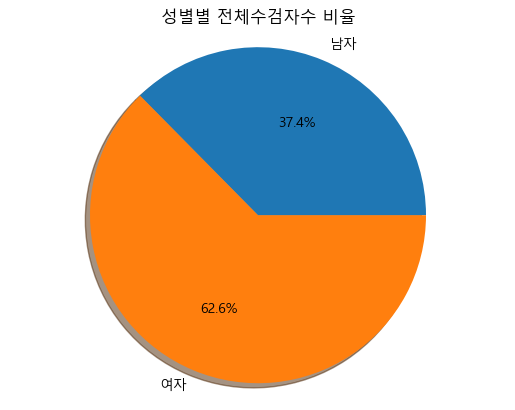

In [21]:
# 성별별 전체수검자수비율 파이차트
sex_data = sex_data.pivot_table(index = "성별", values = "전체수검자수", aggfunc = "mean")

plt.pie(sex_data["전체수검자수"], labels=sex_data.index, autopct='%1.1f%%', shadow = True)
plt.axis('equal') 
plt.title("성별별 전체수검자수 비율")
plt.show()

In [23]:
# 서울특별시 시군구 리스트
i_list = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

In [24]:
data_filter = data[data["시군구"] == '종로구']
data_filter

,시군구,연령,성별,전체대상자수,전체수검자수
0,종로구,20-24세,여자,2077,37.9
1,종로구,25-29세,여자,2084,56.3
2,종로구,30-34세,여자,2832,61.2
3,종로구,35-39세,여자,1837,60.2
4,종로구,40-44세,남자,2673,55.3
5,종로구,40-44세,여자,3033,72.0
6,종로구,45-49세,남자,2080,58.0
7,종로구,45-49세,여자,2452,71.8
8,종로구,50-54세,남자,5322,42.5
9,종로구,50-54세,여자,5709,54.1


In [25]:
data_pivot = data.pivot_table(index = "연령", columns = "성별", values = "전체수검자수")
data_pivot

성별,남자,여자
연령,,
20-24세,NaN,35.860
25-29세,NaN,59.416
30-34세,NaN,64.560
35-39세,NaN,65.116
40-44세,60.328,74.044
45-49세,62.388,75.184
50-54세,46.260,57.676
55-59세,41.768,52.528
60-64세,51.628,60.988


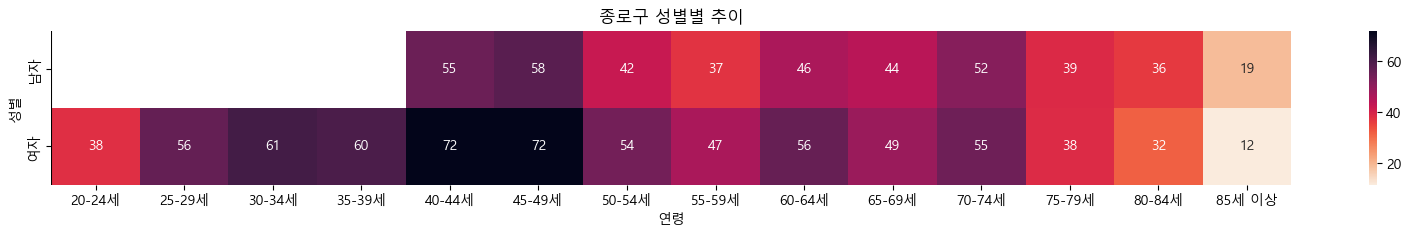

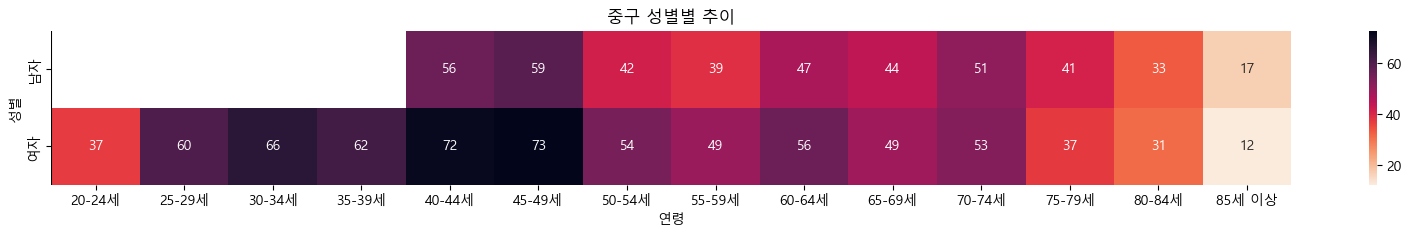

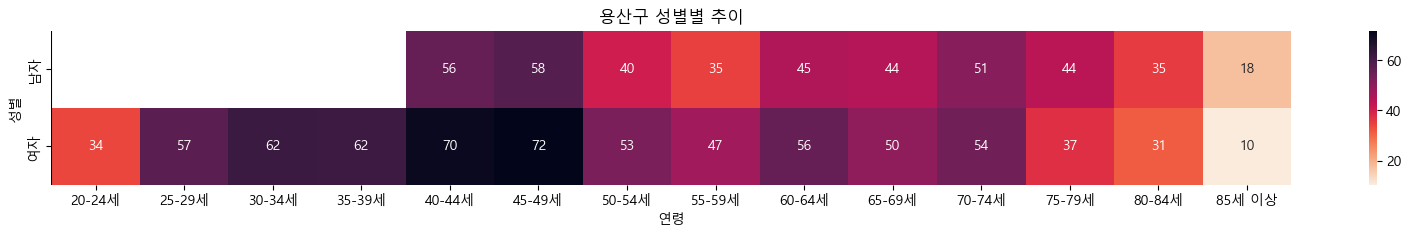

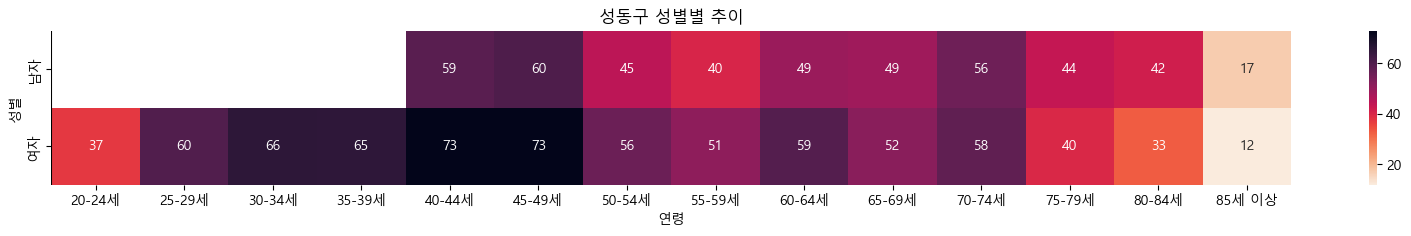

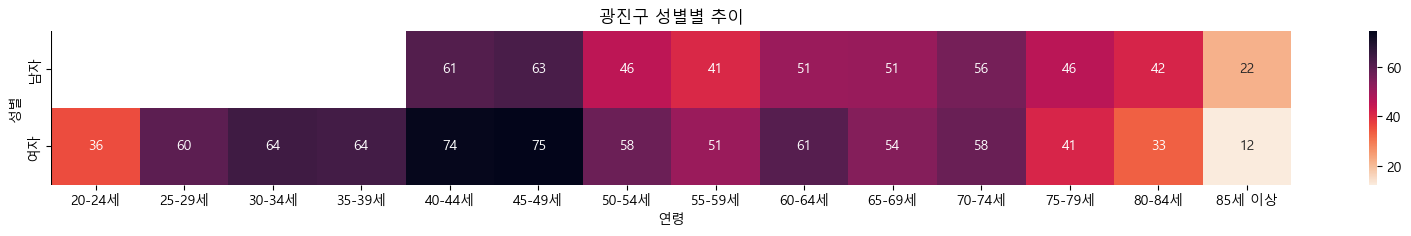

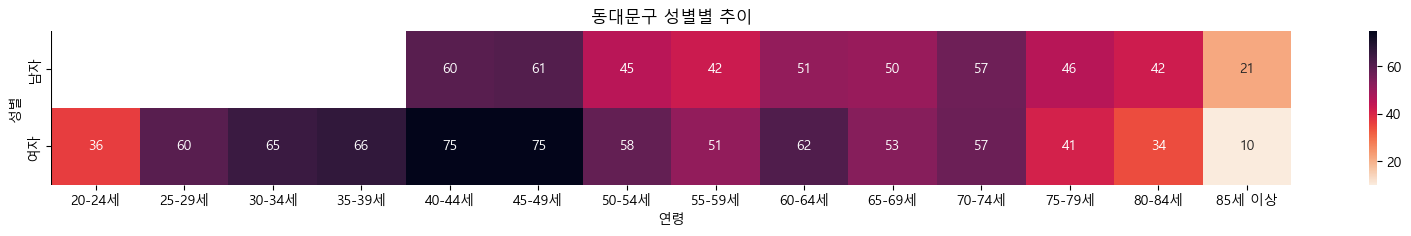

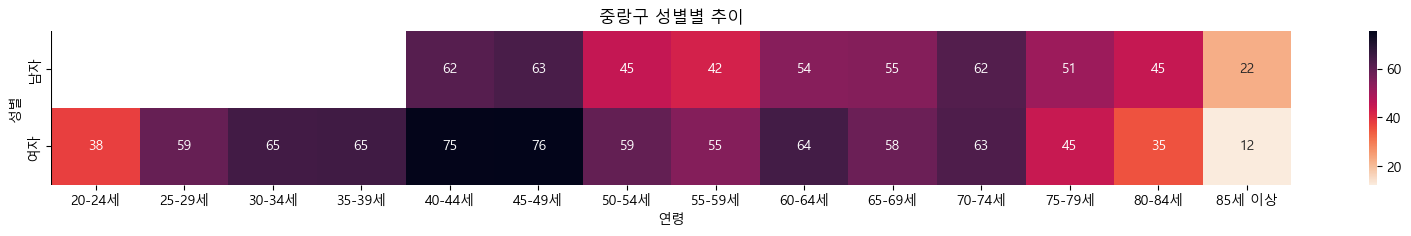

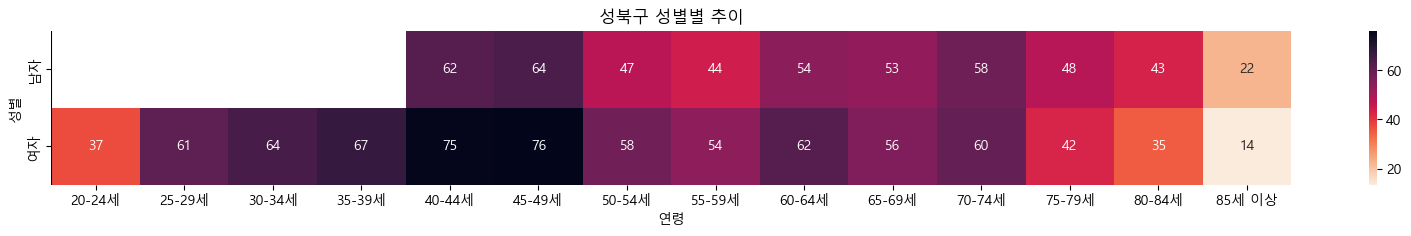

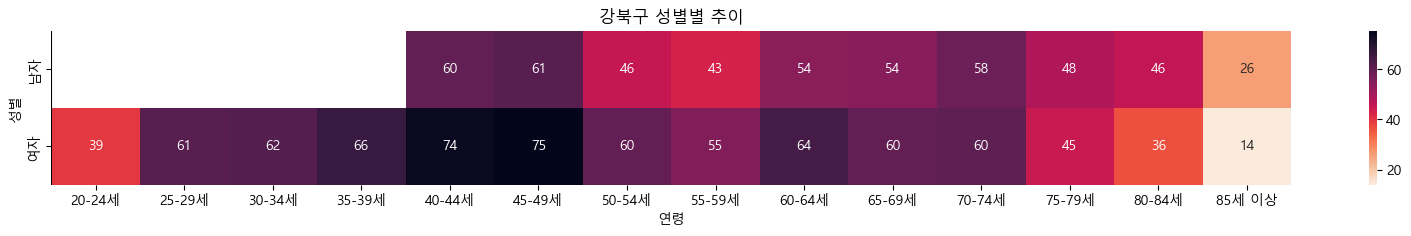

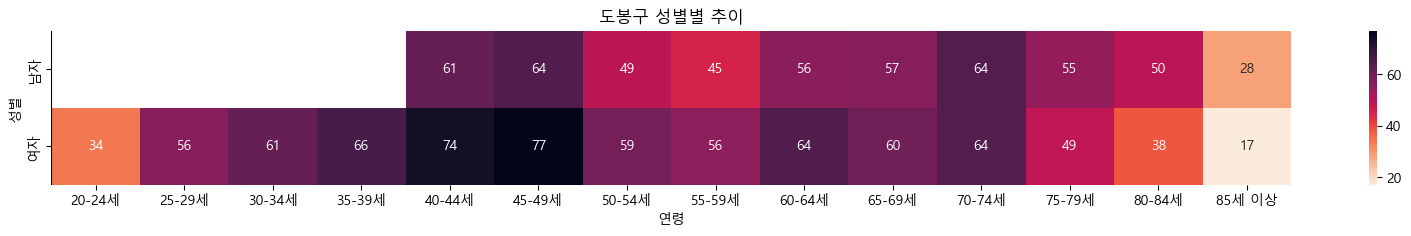

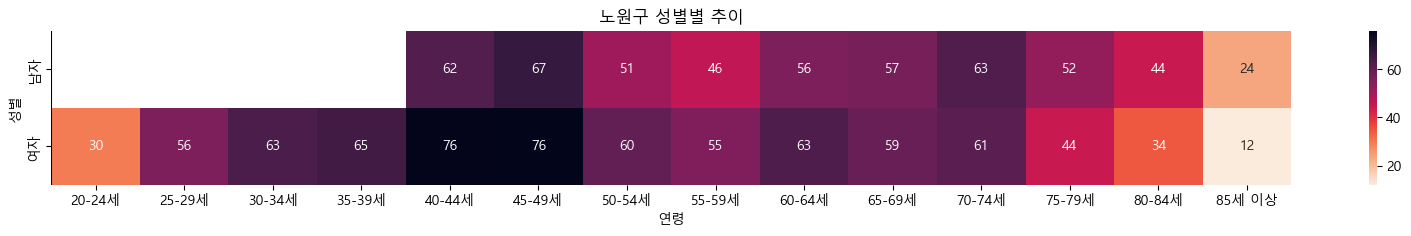

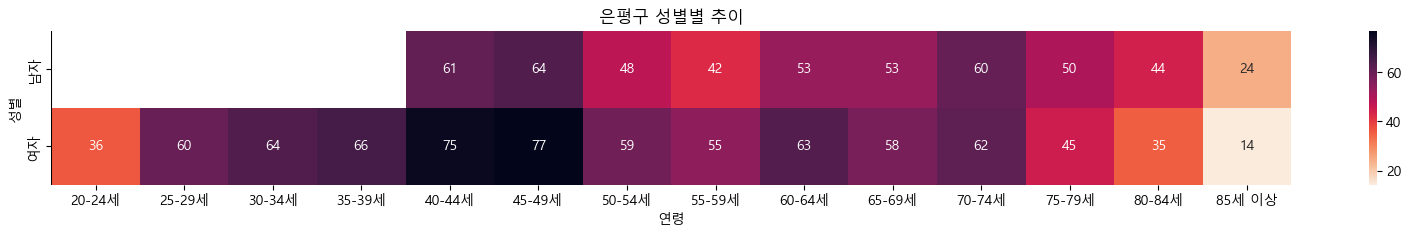

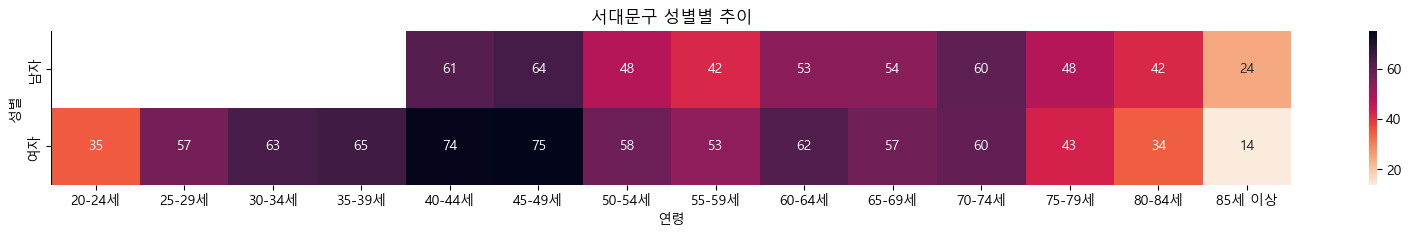

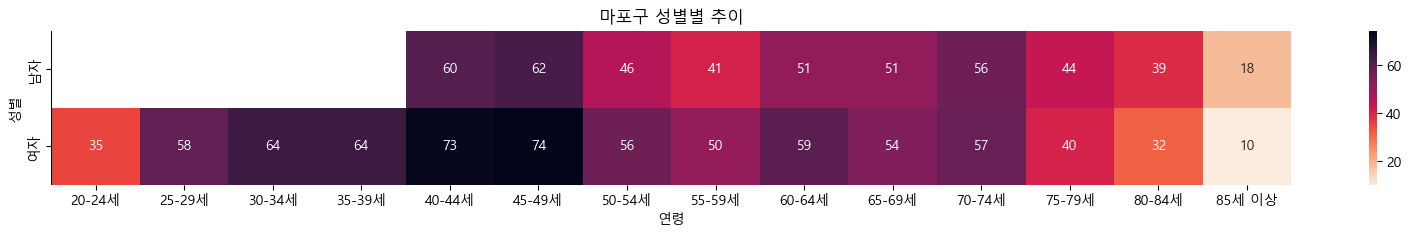

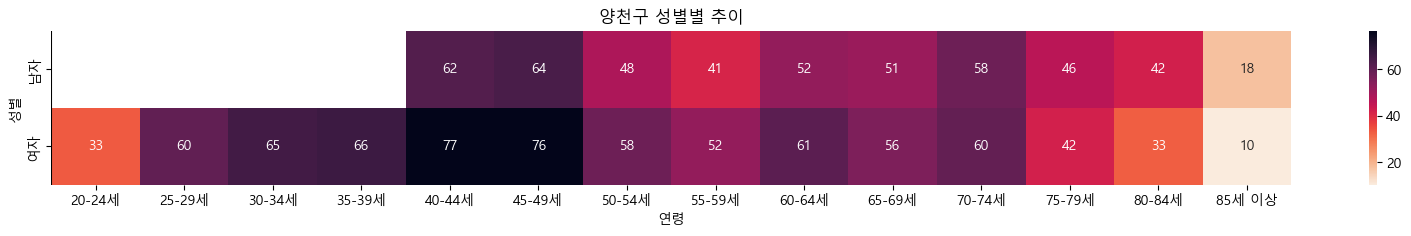

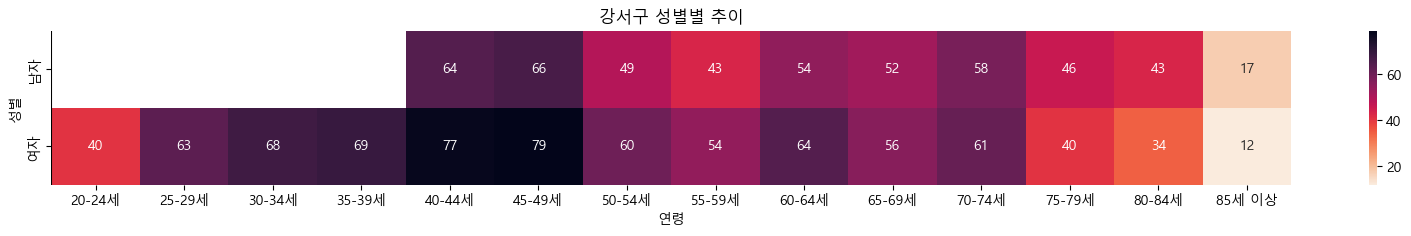

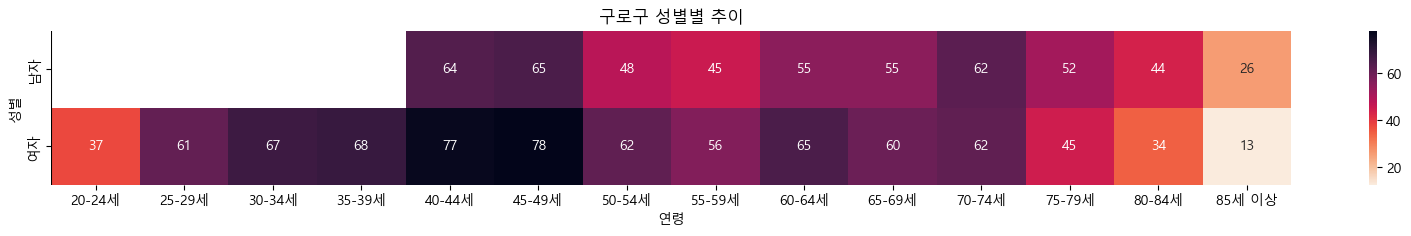

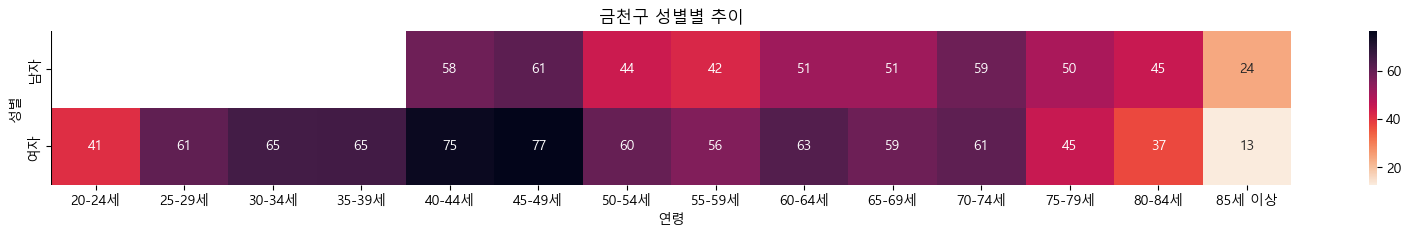

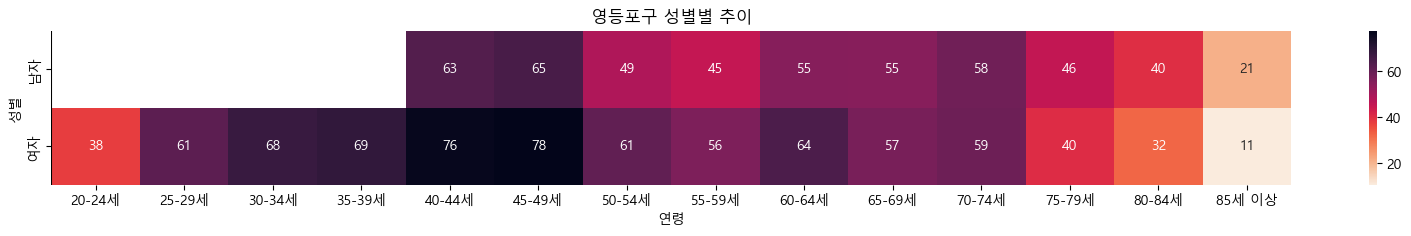

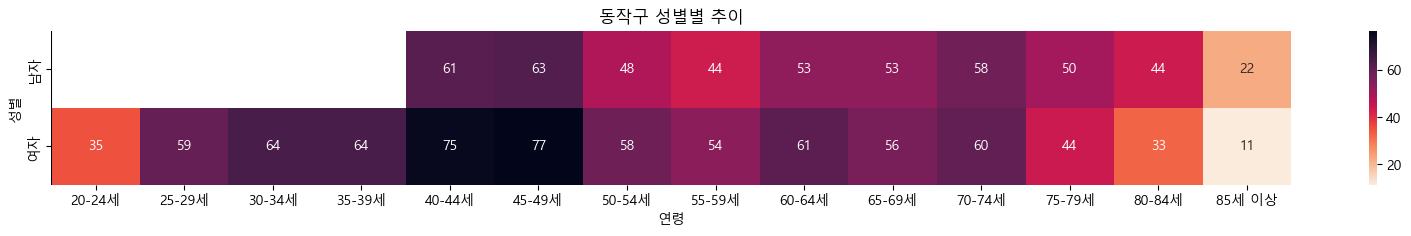

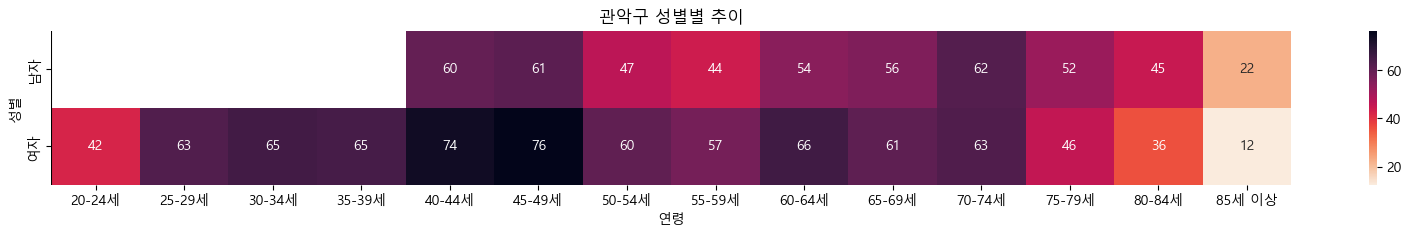

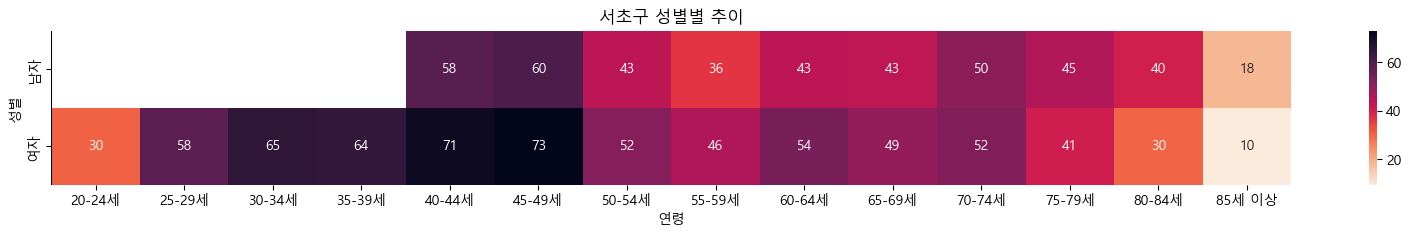

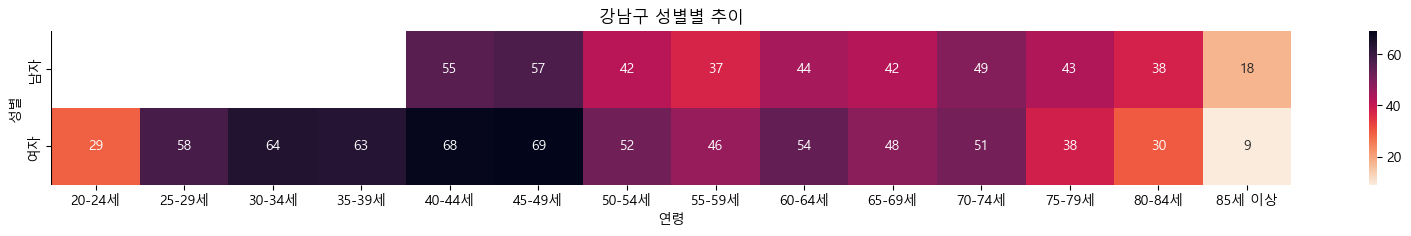

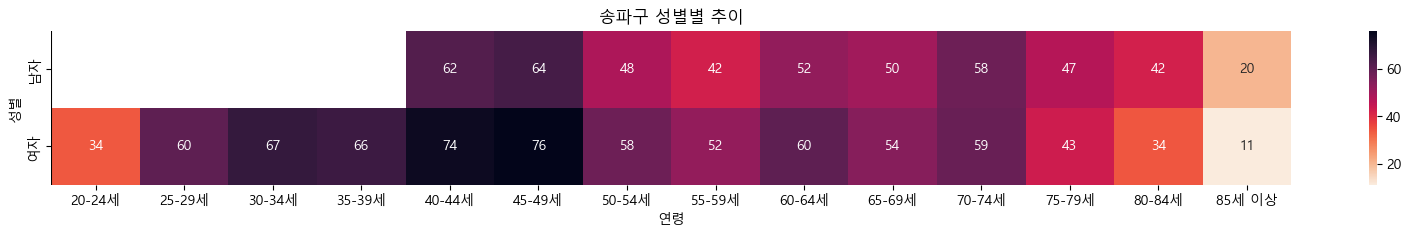

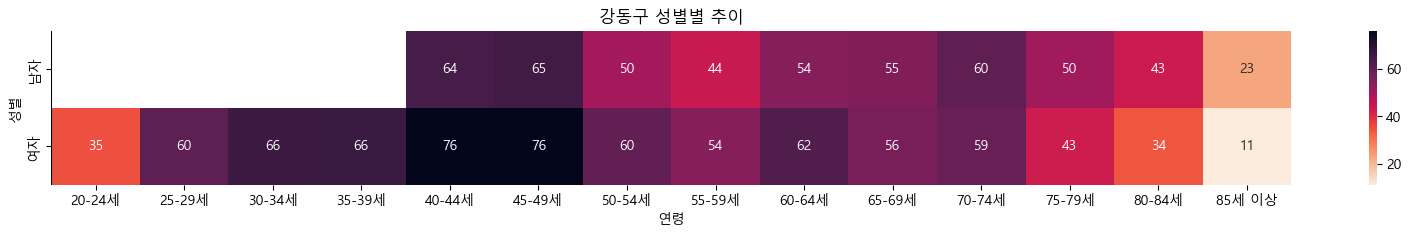

In [26]:
# 서울시 지역구별 시각화
for i in i_list:
    data_filter = data[data["시군구"] == i]
        
    data_pivot = data_filter.pivot_table(index = "성별", columns = "연령", values = "전체수검자수")

    plt.figure(figsize = (20, 2))
    
    sns.heatmap(data_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")
    
    plt.title(f"{i} 히트맵")
    plt.plot(data_filter["성별"], data_filter["연령"], color = "black")
    plt.title(f"{i} 성별별 추이")
    plt.xlabel("연령")
    plt.ylabel("성별")

    plt.show()
    

In [27]:
# 전체 평균
can_mean = data["전체수검자수"].mean()
can_mean

51.1905

In [28]:
# 지역별 평균
canc_mean = data.groupby("시군구")["전체수검자수"].mean()
canc_mean

시군구
강남구     46.029167
강동구     52.770833
강북구     52.870833
강서구     52.937500
관악구     53.791667
광진구     50.708333
구로구     54.258333
금천구     52.579167
노원구     53.112500
도봉구     54.325000
동대문구    50.850000
동작구     51.966667
마포구     49.829167
서대문구    51.887500
서초구     47.129167
성동구     49.720833
성북구     52.279167
송파구     51.458333
양천구     51.316667
영등포구    52.762500
용산구     46.725000
은평구     52.925000
종로구     47.162500
중구      47.475000
중랑구     52.891667
Name: 전체수검자수, dtype: float64

In [29]:
# 전체평균보다 높은 지역구별 
canc_mean[canc_mean >= can_mean]

시군구
강동구     52.770833
강북구     52.870833
강서구     52.937500
관악구     53.791667
구로구     54.258333
금천구     52.579167
노원구     53.112500
도봉구     54.325000
동작구     51.966667
서대문구    51.887500
성북구     52.279167
송파구     51.458333
양천구     51.316667
영등포구    52.762500
은평구     52.925000
중랑구     52.891667
Name: 전체수검자수, dtype: float64

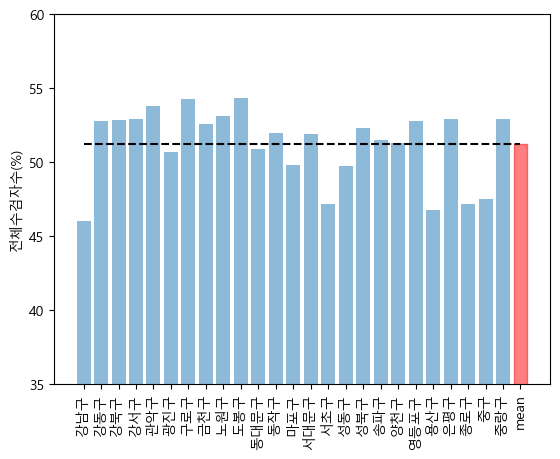

In [30]:
# 전체 평균도 시각화해주기 위해서 지역구 리스트에 mean 추가
continents = canc_mean.index.tolist()
continents.append("mean")
plt.ylim(35, 60)

x_pos = np.arange(len(continents))

alc = canc_mean.tolist()
alc.append(can_mean)

bar_list = plt.bar(x_pos, alc, alpha = 0.5)

# 마지막 bar만 빨간색으로 변경
bar_list[-1].set_color("r")

# 평균선 그리기
plt.plot([0, len(continents) -1], [can_mean, can_mean], "k--")   # [0, len(continents) -1] = [0, 6]     , "k--" : 선스타일

plt.xticks(x_pos, continents, rotation=90)
plt.ylabel("전체수검자수(%)")
plt.title("")
plt.show()

In [31]:
data.groupby("시군구")["전체수검자수"].mean().idxmax()

'도봉구'

In [32]:
group_gu = data.groupby("시군구")["전체수검자수"].mean()
group_gu

시군구
강남구     46.029167
강동구     52.770833
강북구     52.870833
강서구     52.937500
관악구     53.791667
광진구     50.708333
구로구     54.258333
금천구     52.579167
노원구     53.112500
도봉구     54.325000
동대문구    50.850000
동작구     51.966667
마포구     49.829167
서대문구    51.887500
서초구     47.129167
성동구     49.720833
성북구     52.279167
송파구     51.458333
양천구     51.316667
영등포구    52.762500
용산구     46.725000
은평구     52.925000
종로구     47.162500
중구      47.475000
중랑구     52.891667
Name: 전체수검자수, dtype: float64

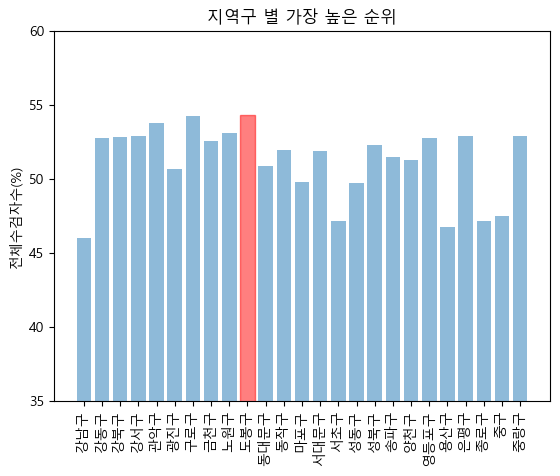

In [33]:
# 지역구 별 가장 높은 순위
continents = group_gu.index.tolist()
plt.ylim(35, 60)
x_pos = np.arange(len(group_gu))

bar_list = plt.bar(x_pos, group_gu, alpha = 0.5)
bar_list[continents.index("도봉구")].set_color("r")

plt.xticks(x_pos, continents, rotation=90)
plt.ylabel("전체수검자수(%)")
plt.title("지역구 별 가장 높은 순위")
plt.show()